## Code actionnable 

L'idee du code actionnable est de produire un code sur lequel on puisse appliquer des transformations lineaires simples : rotations, translations, homoteties.

On étudie le melange de deux flux d'information, l'un étant l'identité (invariant selon les poses), l'autre etant l'action (l'information spatiale) appliquee sur l'objet.


en entrée : x uniquement

**Idee principale : l' encodeur produit un code latent selon le principe VAE (dimension 6). 
Ce code latent est "divisé" en 2 composantes (maximalement independants de par la contrainte KL).**

les 3 premieres composantes servent à "agir sur le code" :
  - l'action consiste à appliquer une des trois rotations 3D sur le code généré à partir de la composante "identité" invariante. les rotations dans l'espace latent sont ici supposées coder pour des translations dans l'espace des pixels
  
  
Elles doivent donc selectionner une information spatiale utile à l'encodage de la position.


Les 3 dernieres composantes sont utilisées comme entree d'un classifieur **supervisé**. Elles doivent donc selectionner une information utile à la classification.

Le code de la couche latente est directement projeté sur la couche actionnable 3D 

**ici n = 64 **


validation du code par reconstruction de x en sortie (BCE Loss)

**on prend ici** : KL_FLAG = 0.1 (cas standard) !! KL < 0.1 tend a produire une structure d'espace moins homogene...

**Mise en place d'un code direct par projection lineaire (matrice aleatoire). On constate que selon la valeur de KL, le code latent a tendance à coder le label sur une seule dimension (et non 3). Deux dimensions demeurent inexploitees (entropie elevee). De meme, sur 3 rotations, l'apprentissage tend à en selectionner 2 (ce qui est benefique)
Dans le test presenté ici, le label est explicitement codé sur 1D (DIM_Z = 1), et la position sur 2D (DIM_U = 3 mais**
**seules 2 rotations sont actives). Apprentissage d'uns structure d'espace et lassif tendant vers 0.correcte mais la reconstruction reste un peu grossiere.**


In [1]:
%matplotlib inline

In [2]:
from Where_act_code_VAE_classif_rot import init
args = init(verbose=1, epochs=10)
print('Parameters=', args)

Parameters= {'size': 64, 'log_interval': 10, 'no_cuda': True, 'momentum': 0.48, 'test_batch_size': 1, 'batch_size': 50, 'std': 1.0, 'valid_size': 0.2, 'seed': 42, 'epochs': 10, 'verbose': 1, 'num_processes': 1, 'mean': 0.0, 'dimension': 25, 'lr': 0.001}


In [3]:
import numpy as np
import torch

In [4]:
import easydict

## Réseau de neurones

### Lancer l'apprentissage ou charger les données

In [24]:
path = '2018-08-01_actionnable_code_VAE_classif_rot_latent256_KL_0_1_code64_ROT2_DIM1.pt'

In [6]:
!ls -l {path}
!rm {path}

ls: impossible d'accéder à 'None': Aucun fichier ou dossier de ce type
rm: impossible de supprimer 'None': Aucun fichier ou dossier de ce type


In [21]:
from Where_act_code_VAE_classif_rot import ML
ml = ML(args)

ImportError: No module named 'Where_act_code_VAE_classif_rot2_DIM1'

(<matplotlib.figure.Figure at 0x7fe10222cd68>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7fe0ff0fd780>)

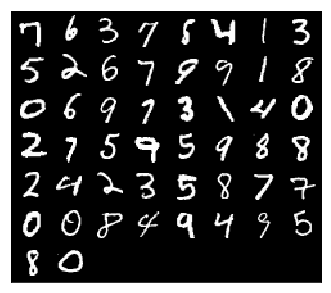

In [8]:
ml.dataset.show()

In [9]:
print(ml.model)

Net(
  (conv1): Conv2d(1, 16, kernel_size=(4, 4), stride=(4, 4))
  (conv2): Conv2d(16, 64, kernel_size=(4, 4), stride=(4, 4))
  (conv3): Conv2d(64, 256, kernel_size=(4, 4), stride=(4, 4))
  (fc_x): Linear(in_features=256, out_features=32, bias=False)
  (fc_mu): Linear(in_features=32, out_features=4, bias=False)
  (fc_logvar): Linear(in_features=32, out_features=4, bias=False)
  (fc_classif_1): Linear(in_features=1, out_features=256, bias=True)
  (fc_classif_2): Linear(in_features=256, out_features=10, bias=True)
  (deconv3): ConvTranspose2d(256, 64, kernel_size=(4, 4), stride=(4, 4))
  (deconv2): ConvTranspose2d(64, 16, kernel_size=(4, 4), stride=(4, 4))
  (deconv1): ConvTranspose2d(16, 1, kernel_size=(4, 4), stride=(4, 4))
)


In [10]:
ml.args.epochs = 1000

In [11]:
#ml.model.fc_logvar.weight

In [12]:
#ml.model.fc_logvar.weight

In [13]:
#ml.model.fc_mu.weight

In [14]:
#ml.model.fc_mu.weight

In [15]:
ml.train(None)

Train Epoch
Train Epoch: 1 [0/60000 (0%)]	classif Loss: 147.06	BCE_loss: 2839.16	KL: 0.00	Acc: 0.04
Train Epoch: 1 [500/60000 (1%)]	classif Loss: 149.91	BCE_loss: 1875.27	KL: 0.12	Acc: 0.10
Train Epoch: 1 [1000/60000 (2%)]	classif Loss: 149.96	BCE_loss: 776.51	KL: 0.05	Acc: 0.04
Train Epoch: 1 [1500/60000 (2%)]	classif Loss: 146.31	BCE_loss: 479.39	KL: 0.00	Acc: 0.18
Train Epoch: 1 [2000/60000 (3%)]	classif Loss: 147.68	BCE_loss: 486.60	KL: 0.00	Acc: 0.08
Train Epoch: 1 [2500/60000 (4%)]	classif Loss: 147.88	BCE_loss: 462.06	KL: 0.01	Acc: 0.06
Train Epoch: 1 [3000/60000 (5%)]	classif Loss: 148.01	BCE_loss: 444.38	KL: 0.01	Acc: 0.06
Train Epoch: 1 [3500/60000 (6%)]	classif Loss: 148.88	BCE_loss: 409.22	KL: 0.03	Acc: 0.12
Train Epoch: 1 [4000/60000 (7%)]	classif Loss: 146.23	BCE_loss: 427.52	KL: 0.07	Acc: 0.20
Train Epoch: 1 [4500/60000 (8%)]	classif Loss: 148.76	BCE_loss: 443.26	KL: 0.03	Acc: 0.14
Train Epoch: 1 [5000/60000 (8%)]	classif Loss: 148.37	BCE_loss: 377.72	KL: 0.02	Acc: 0.12


Train Epoch: 1 [44500/60000 (74%)]	classif Loss: 108.57	BCE_loss: 249.83	KL: 28.28	Acc: 0.36
Train Epoch: 1 [45000/60000 (75%)]	classif Loss: 117.81	BCE_loss: 266.26	KL: 28.61	Acc: 0.24
Train Epoch: 1 [45500/60000 (76%)]	classif Loss: 123.77	BCE_loss: 247.13	KL: 27.14	Acc: 0.20
Train Epoch: 1 [46000/60000 (77%)]	classif Loss: 125.92	BCE_loss: 243.72	KL: 26.53	Acc: 0.22
Train Epoch: 1 [46500/60000 (78%)]	classif Loss: 132.88	BCE_loss: 256.78	KL: 31.06	Acc: 0.24
Train Epoch: 1 [47000/60000 (78%)]	classif Loss: 115.49	BCE_loss: 248.67	KL: 29.87	Acc: 0.30
Train Epoch: 1 [47500/60000 (79%)]	classif Loss: 116.62	BCE_loss: 237.48	KL: 28.55	Acc: 0.26
Train Epoch: 1 [48000/60000 (80%)]	classif Loss: 107.15	BCE_loss: 233.97	KL: 26.97	Acc: 0.30
Train Epoch: 1 [48500/60000 (81%)]	classif Loss: 126.62	BCE_loss: 249.12	KL: 27.94	Acc: 0.22
Train Epoch: 1 [49000/60000 (82%)]	classif Loss: 115.06	BCE_loss: 239.70	KL: 27.58	Acc: 0.26
Train Epoch: 1 [49500/60000 (82%)]	classif Loss: 116.59	BCE_loss: 251.

Train Epoch: 2 [29000/60000 (48%)]	classif Loss: 102.70	BCE_loss: 220.97	KL: 33.03	Acc: 0.38
Train Epoch: 2 [29500/60000 (49%)]	classif Loss: 97.88	BCE_loss: 223.02	KL: 33.62	Acc: 0.40
Train Epoch: 2 [30000/60000 (50%)]	classif Loss: 118.85	BCE_loss: 215.59	KL: 32.45	Acc: 0.30
Train Epoch: 2 [30500/60000 (51%)]	classif Loss: 109.04	BCE_loss: 222.06	KL: 31.96	Acc: 0.20
Train Epoch: 2 [31000/60000 (52%)]	classif Loss: 109.40	BCE_loss: 222.31	KL: 30.87	Acc: 0.28
Train Epoch: 2 [31500/60000 (52%)]	classif Loss: 105.91	BCE_loss: 221.64	KL: 32.40	Acc: 0.34
Train Epoch: 2 [32000/60000 (53%)]	classif Loss: 87.25	BCE_loss: 208.37	KL: 35.85	Acc: 0.48
Train Epoch: 2 [32500/60000 (54%)]	classif Loss: 100.95	BCE_loss: 223.81	KL: 31.25	Acc: 0.34
Train Epoch: 2 [33000/60000 (55%)]	classif Loss: 95.75	BCE_loss: 223.21	KL: 33.22	Acc: 0.42
Train Epoch: 2 [33500/60000 (56%)]	classif Loss: 109.84	BCE_loss: 233.94	KL: 33.45	Acc: 0.26
Train Epoch: 2 [34000/60000 (57%)]	classif Loss: 102.38	BCE_loss: 215.00	

Train Epoch: 3 [13500/60000 (22%)]	classif Loss: 89.22	BCE_loss: 199.97	KL: 37.17	Acc: 0.40
Train Epoch: 3 [14000/60000 (23%)]	classif Loss: 99.73	BCE_loss: 225.77	KL: 34.28	Acc: 0.32
Train Epoch: 3 [14500/60000 (24%)]	classif Loss: 90.66	BCE_loss: 218.55	KL: 32.48	Acc: 0.46
Train Epoch: 3 [15000/60000 (25%)]	classif Loss: 88.87	BCE_loss: 208.37	KL: 35.33	Acc: 0.44
Train Epoch: 3 [15500/60000 (26%)]	classif Loss: 95.80	BCE_loss: 225.22	KL: 32.77	Acc: 0.32
Train Epoch: 3 [16000/60000 (27%)]	classif Loss: 84.76	BCE_loss: 203.50	KL: 35.76	Acc: 0.42
Train Epoch: 3 [16500/60000 (28%)]	classif Loss: 101.25	BCE_loss: 215.75	KL: 32.74	Acc: 0.34
Train Epoch: 3 [17000/60000 (28%)]	classif Loss: 99.47	BCE_loss: 210.93	KL: 35.59	Acc: 0.36
Train Epoch: 3 [17500/60000 (29%)]	classif Loss: 93.94	BCE_loss: 214.33	KL: 34.57	Acc: 0.28
Train Epoch: 3 [18000/60000 (30%)]	classif Loss: 98.18	BCE_loss: 226.50	KL: 33.78	Acc: 0.34
Train Epoch: 3 [18500/60000 (31%)]	classif Loss: 97.47	BCE_loss: 209.08	KL: 35.

Train Epoch: 3 [58000/60000 (97%)]	classif Loss: 90.38	BCE_loss: 206.78	KL: 35.18	Acc: 0.40
Train Epoch: 3 [58500/60000 (98%)]	classif Loss: 95.18	BCE_loss: 220.89	KL: 36.26	Acc: 0.42
Train Epoch: 3 [59000/60000 (98%)]	classif Loss: 93.75	BCE_loss: 224.22	KL: 35.49	Acc: 0.44
Train Epoch: 3 [59500/60000 (99%)]	classif Loss: 89.07	BCE_loss: 225.55	KL: 35.35	Acc: 0.48
Train Epoch: 4 [0/60000 (0%)]	classif Loss: 103.61	BCE_loss: 224.73	KL: 34.38	Acc: 0.38
Train Epoch: 4 [500/60000 (1%)]	classif Loss: 107.91	BCE_loss: 217.77	KL: 34.18	Acc: 0.36
Train Epoch: 4 [1000/60000 (2%)]	classif Loss: 100.35	BCE_loss: 222.64	KL: 35.80	Acc: 0.32
Train Epoch: 4 [1500/60000 (2%)]	classif Loss: 94.05	BCE_loss: 208.68	KL: 33.35	Acc: 0.38
Train Epoch: 4 [2000/60000 (3%)]	classif Loss: 90.76	BCE_loss: 221.73	KL: 36.39	Acc: 0.50
Train Epoch: 4 [2500/60000 (4%)]	classif Loss: 95.99	BCE_loss: 217.21	KL: 34.59	Acc: 0.44
Train Epoch: 4 [3000/60000 (5%)]	classif Loss: 111.36	BCE_loss: 204.08	KL: 35.14	Acc: 0.40
Tr

Train Epoch: 4 [43000/60000 (72%)]	classif Loss: 88.93	BCE_loss: 212.90	KL: 36.17	Acc: 0.44
Train Epoch: 4 [43500/60000 (72%)]	classif Loss: 88.60	BCE_loss: 212.42	KL: 36.72	Acc: 0.46
Train Epoch: 4 [44000/60000 (73%)]	classif Loss: 88.10	BCE_loss: 210.55	KL: 35.99	Acc: 0.42
Train Epoch: 4 [44500/60000 (74%)]	classif Loss: 87.78	BCE_loss: 216.52	KL: 36.76	Acc: 0.50
Train Epoch: 4 [45000/60000 (75%)]	classif Loss: 77.34	BCE_loss: 211.00	KL: 35.80	Acc: 0.42
Train Epoch: 4 [45500/60000 (76%)]	classif Loss: 101.03	BCE_loss: 222.02	KL: 35.03	Acc: 0.36
Train Epoch: 4 [46000/60000 (77%)]	classif Loss: 97.35	BCE_loss: 219.93	KL: 34.66	Acc: 0.36
Train Epoch: 4 [46500/60000 (78%)]	classif Loss: 94.27	BCE_loss: 211.91	KL: 35.59	Acc: 0.44
Train Epoch: 4 [47000/60000 (78%)]	classif Loss: 81.69	BCE_loss: 215.70	KL: 37.76	Acc: 0.46
Train Epoch: 4 [47500/60000 (79%)]	classif Loss: 82.80	BCE_loss: 213.72	KL: 35.29	Acc: 0.44
Train Epoch: 4 [48000/60000 (80%)]	classif Loss: 86.70	BCE_loss: 207.41	KL: 36.

Train Epoch: 5 [28000/60000 (47%)]	classif Loss: 92.13	BCE_loss: 211.63	KL: 36.56	Acc: 0.58
Train Epoch: 5 [28500/60000 (48%)]	classif Loss: 84.04	BCE_loss: 212.54	KL: 36.46	Acc: 0.36
Train Epoch: 5 [29000/60000 (48%)]	classif Loss: 87.81	BCE_loss: 203.55	KL: 36.10	Acc: 0.44
Train Epoch: 5 [29500/60000 (49%)]	classif Loss: 103.31	BCE_loss: 219.29	KL: 35.12	Acc: 0.32
Train Epoch: 5 [30000/60000 (50%)]	classif Loss: 94.52	BCE_loss: 220.89	KL: 34.32	Acc: 0.30
Train Epoch: 5 [30500/60000 (51%)]	classif Loss: 67.15	BCE_loss: 213.67	KL: 36.10	Acc: 0.64
Train Epoch: 5 [31000/60000 (52%)]	classif Loss: 101.27	BCE_loss: 222.61	KL: 35.91	Acc: 0.38
Train Epoch: 5 [31500/60000 (52%)]	classif Loss: 87.95	BCE_loss: 226.22	KL: 37.51	Acc: 0.48
Train Epoch: 5 [32000/60000 (53%)]	classif Loss: 104.76	BCE_loss: 212.37	KL: 37.15	Acc: 0.32
Train Epoch: 5 [32500/60000 (54%)]	classif Loss: 80.37	BCE_loss: 216.19	KL: 35.55	Acc: 0.38
Train Epoch: 5 [33000/60000 (55%)]	classif Loss: 82.12	BCE_loss: 202.46	KL: 3

Train Epoch: 6 [13000/60000 (22%)]	classif Loss: 90.20	BCE_loss: 219.57	KL: 35.92	Acc: 0.40
Train Epoch: 6 [13500/60000 (22%)]	classif Loss: 78.72	BCE_loss: 210.07	KL: 36.69	Acc: 0.58
Train Epoch: 6 [14000/60000 (23%)]	classif Loss: 80.11	BCE_loss: 200.39	KL: 34.62	Acc: 0.60
Train Epoch: 6 [14500/60000 (24%)]	classif Loss: 82.92	BCE_loss: 215.16	KL: 35.15	Acc: 0.42
Train Epoch: 6 [15000/60000 (25%)]	classif Loss: 89.22	BCE_loss: 208.26	KL: 37.47	Acc: 0.44
Train Epoch: 6 [15500/60000 (26%)]	classif Loss: 90.79	BCE_loss: 225.44	KL: 37.53	Acc: 0.50
Train Epoch: 6 [16000/60000 (27%)]	classif Loss: 91.69	BCE_loss: 206.24	KL: 36.10	Acc: 0.42
Train Epoch: 6 [16500/60000 (28%)]	classif Loss: 86.40	BCE_loss: 205.48	KL: 36.61	Acc: 0.50
Train Epoch: 6 [17000/60000 (28%)]	classif Loss: 82.15	BCE_loss: 219.87	KL: 35.97	Acc: 0.48
Train Epoch: 6 [17500/60000 (29%)]	classif Loss: 75.19	BCE_loss: 218.13	KL: 35.08	Acc: 0.54
Train Epoch: 6 [18000/60000 (30%)]	classif Loss: 92.07	BCE_loss: 211.77	KL: 34.9

Train Epoch: 6 [58000/60000 (97%)]	classif Loss: 67.34	BCE_loss: 214.83	KL: 39.55	Acc: 0.60
Train Epoch: 6 [58500/60000 (98%)]	classif Loss: 89.98	BCE_loss: 210.25	KL: 37.44	Acc: 0.40
Train Epoch: 6 [59000/60000 (98%)]	classif Loss: 74.39	BCE_loss: 207.75	KL: 36.33	Acc: 0.50
Train Epoch: 6 [59500/60000 (99%)]	classif Loss: 73.77	BCE_loss: 198.10	KL: 35.98	Acc: 0.62
Train Epoch: 7 [0/60000 (0%)]	classif Loss: 76.71	BCE_loss: 218.23	KL: 36.54	Acc: 0.58
Train Epoch: 7 [500/60000 (1%)]	classif Loss: 83.03	BCE_loss: 206.50	KL: 36.52	Acc: 0.44
Train Epoch: 7 [1000/60000 (2%)]	classif Loss: 79.31	BCE_loss: 212.08	KL: 37.55	Acc: 0.48
Train Epoch: 7 [1500/60000 (2%)]	classif Loss: 82.87	BCE_loss: 227.41	KL: 37.53	Acc: 0.64
Train Epoch: 7 [2000/60000 (3%)]	classif Loss: 71.55	BCE_loss: 223.47	KL: 37.08	Acc: 0.64
Train Epoch: 7 [2500/60000 (4%)]	classif Loss: 90.47	BCE_loss: 212.09	KL: 37.98	Acc: 0.42
Train Epoch: 7 [3000/60000 (5%)]	classif Loss: 79.47	BCE_loss: 210.01	KL: 37.78	Acc: 0.46
Train 

Train Epoch: 7 [43000/60000 (72%)]	classif Loss: 70.49	BCE_loss: 204.80	KL: 37.65	Acc: 0.44
Train Epoch: 7 [43500/60000 (72%)]	classif Loss: 72.88	BCE_loss: 208.02	KL: 37.66	Acc: 0.50
Train Epoch: 7 [44000/60000 (73%)]	classif Loss: 62.74	BCE_loss: 207.76	KL: 37.82	Acc: 0.56
Train Epoch: 7 [44500/60000 (74%)]	classif Loss: 101.33	BCE_loss: 205.21	KL: 35.43	Acc: 0.40
Train Epoch: 7 [45000/60000 (75%)]	classif Loss: 68.69	BCE_loss: 203.70	KL: 37.93	Acc: 0.48
Train Epoch: 7 [45500/60000 (76%)]	classif Loss: 79.50	BCE_loss: 191.47	KL: 36.82	Acc: 0.48
Train Epoch: 7 [46000/60000 (77%)]	classif Loss: 68.47	BCE_loss: 212.74	KL: 35.86	Acc: 0.66
Train Epoch: 7 [46500/60000 (78%)]	classif Loss: 74.20	BCE_loss: 212.37	KL: 36.24	Acc: 0.50
Train Epoch: 7 [47000/60000 (78%)]	classif Loss: 69.75	BCE_loss: 195.88	KL: 38.40	Acc: 0.46
Train Epoch: 7 [47500/60000 (79%)]	classif Loss: 72.85	BCE_loss: 195.73	KL: 35.79	Acc: 0.60
Train Epoch: 7 [48000/60000 (80%)]	classif Loss: 67.43	BCE_loss: 204.49	KL: 37.

Train Epoch: 8 [28000/60000 (47%)]	classif Loss: 71.92	BCE_loss: 210.02	KL: 36.57	Acc: 0.52
Train Epoch: 8 [28500/60000 (48%)]	classif Loss: 68.35	BCE_loss: 211.71	KL: 36.10	Acc: 0.58
Train Epoch: 8 [29000/60000 (48%)]	classif Loss: 80.31	BCE_loss: 213.36	KL: 36.69	Acc: 0.56
Train Epoch: 8 [29500/60000 (49%)]	classif Loss: 98.69	BCE_loss: 205.42	KL: 37.02	Acc: 0.52
Train Epoch: 8 [30000/60000 (50%)]	classif Loss: 76.99	BCE_loss: 202.70	KL: 36.57	Acc: 0.52
Train Epoch: 8 [30500/60000 (51%)]	classif Loss: 91.31	BCE_loss: 214.18	KL: 37.95	Acc: 0.48
Train Epoch: 8 [31000/60000 (52%)]	classif Loss: 84.40	BCE_loss: 220.33	KL: 36.66	Acc: 0.44
Train Epoch: 8 [31500/60000 (52%)]	classif Loss: 67.08	BCE_loss: 220.98	KL: 36.87	Acc: 0.56
Train Epoch: 8 [32000/60000 (53%)]	classif Loss: 76.80	BCE_loss: 228.11	KL: 40.43	Acc: 0.48
Train Epoch: 8 [32500/60000 (54%)]	classif Loss: 96.09	BCE_loss: 207.23	KL: 36.97	Acc: 0.40
Train Epoch: 8 [33000/60000 (55%)]	classif Loss: 80.80	BCE_loss: 206.88	KL: 37.0

Train Epoch: 9 [13000/60000 (22%)]	classif Loss: 63.61	BCE_loss: 221.48	KL: 37.40	Acc: 0.60
Train Epoch: 9 [13500/60000 (22%)]	classif Loss: 80.66	BCE_loss: 211.08	KL: 38.35	Acc: 0.42
Train Epoch: 9 [14000/60000 (23%)]	classif Loss: 91.19	BCE_loss: 206.67	KL: 37.35	Acc: 0.42
Train Epoch: 9 [14500/60000 (24%)]	classif Loss: 106.11	BCE_loss: 212.92	KL: 35.58	Acc: 0.42
Train Epoch: 9 [15000/60000 (25%)]	classif Loss: 70.60	BCE_loss: 199.17	KL: 37.91	Acc: 0.52
Train Epoch: 9 [15500/60000 (26%)]	classif Loss: 66.94	BCE_loss: 211.54	KL: 36.45	Acc: 0.56
Train Epoch: 9 [16000/60000 (27%)]	classif Loss: 81.81	BCE_loss: 212.55	KL: 37.34	Acc: 0.62
Train Epoch: 9 [16500/60000 (28%)]	classif Loss: 70.66	BCE_loss: 206.77	KL: 38.23	Acc: 0.60
Train Epoch: 9 [17000/60000 (28%)]	classif Loss: 73.73	BCE_loss: 221.92	KL: 37.21	Acc: 0.54
Train Epoch: 9 [17500/60000 (29%)]	classif Loss: 75.56	BCE_loss: 206.61	KL: 37.80	Acc: 0.54
Train Epoch: 9 [18000/60000 (30%)]	classif Loss: 81.00	BCE_loss: 218.36	KL: 37.

Train Epoch: 9 [58000/60000 (97%)]	classif Loss: 80.15	BCE_loss: 211.00	KL: 38.68	Acc: 0.48
Train Epoch: 9 [58500/60000 (98%)]	classif Loss: 81.47	BCE_loss: 225.42	KL: 39.04	Acc: 0.56
Train Epoch: 9 [59000/60000 (98%)]	classif Loss: 91.73	BCE_loss: 206.71	KL: 37.27	Acc: 0.42
Train Epoch: 9 [59500/60000 (99%)]	classif Loss: 91.65	BCE_loss: 204.57	KL: 36.69	Acc: 0.52
Train Epoch: 10 [0/60000 (0%)]	classif Loss: 75.25	BCE_loss: 217.20	KL: 38.65	Acc: 0.50
Train Epoch: 10 [500/60000 (1%)]	classif Loss: 77.90	BCE_loss: 213.19	KL: 37.77	Acc: 0.52
Train Epoch: 10 [1000/60000 (2%)]	classif Loss: 69.73	BCE_loss: 213.77	KL: 38.66	Acc: 0.56
Train Epoch: 10 [1500/60000 (2%)]	classif Loss: 72.72	BCE_loss: 210.21	KL: 36.69	Acc: 0.58
Train Epoch: 10 [2000/60000 (3%)]	classif Loss: 76.94	BCE_loss: 196.76	KL: 39.29	Acc: 0.46
Train Epoch: 10 [2500/60000 (4%)]	classif Loss: 65.18	BCE_loss: 201.59	KL: 37.13	Acc: 0.50
Train Epoch: 10 [3000/60000 (5%)]	classif Loss: 62.71	BCE_loss: 211.40	KL: 37.44	Acc: 0.64

Train Epoch: 10 [42500/60000 (71%)]	classif Loss: 83.30	BCE_loss: 201.24	KL: 39.28	Acc: 0.34
Train Epoch: 10 [43000/60000 (72%)]	classif Loss: 65.58	BCE_loss: 219.57	KL: 36.88	Acc: 0.54
Train Epoch: 10 [43500/60000 (72%)]	classif Loss: 63.54	BCE_loss: 209.81	KL: 38.04	Acc: 0.56
Train Epoch: 10 [44000/60000 (73%)]	classif Loss: 75.72	BCE_loss: 206.39	KL: 40.69	Acc: 0.54
Train Epoch: 10 [44500/60000 (74%)]	classif Loss: 80.41	BCE_loss: 215.41	KL: 38.12	Acc: 0.60
Train Epoch: 10 [45000/60000 (75%)]	classif Loss: 52.04	BCE_loss: 198.30	KL: 37.24	Acc: 0.76
Train Epoch: 10 [45500/60000 (76%)]	classif Loss: 59.42	BCE_loss: 210.77	KL: 38.67	Acc: 0.66
Train Epoch: 10 [46000/60000 (77%)]	classif Loss: 83.42	BCE_loss: 211.99	KL: 39.49	Acc: 0.58
Train Epoch: 10 [46500/60000 (78%)]	classif Loss: 69.53	BCE_loss: 203.14	KL: 38.88	Acc: 0.52
Train Epoch: 10 [47000/60000 (78%)]	classif Loss: 74.46	BCE_loss: 201.50	KL: 37.63	Acc: 0.64
Train Epoch: 10 [47500/60000 (79%)]	classif Loss: 95.22	BCE_loss: 230.

Train Epoch: 11 [27000/60000 (45%)]	classif Loss: 64.43	BCE_loss: 223.22	KL: 38.73	Acc: 0.60
Train Epoch: 11 [27500/60000 (46%)]	classif Loss: 55.79	BCE_loss: 204.67	KL: 37.99	Acc: 0.64
Train Epoch: 11 [28000/60000 (47%)]	classif Loss: 83.24	BCE_loss: 214.95	KL: 38.25	Acc: 0.54
Train Epoch: 11 [28500/60000 (48%)]	classif Loss: 96.54	BCE_loss: 208.65	KL: 38.50	Acc: 0.50
Train Epoch: 11 [29000/60000 (48%)]	classif Loss: 63.77	BCE_loss: 197.26	KL: 38.60	Acc: 0.64
Train Epoch: 11 [29500/60000 (49%)]	classif Loss: 74.52	BCE_loss: 197.48	KL: 38.53	Acc: 0.48
Train Epoch: 11 [30000/60000 (50%)]	classif Loss: 55.32	BCE_loss: 196.75	KL: 39.03	Acc: 0.70
Train Epoch: 11 [30500/60000 (51%)]	classif Loss: 55.08	BCE_loss: 207.33	KL: 39.90	Acc: 0.72
Train Epoch: 11 [31000/60000 (52%)]	classif Loss: 82.45	BCE_loss: 207.01	KL: 38.47	Acc: 0.56
Train Epoch: 11 [31500/60000 (52%)]	classif Loss: 73.21	BCE_loss: 209.47	KL: 37.59	Acc: 0.48
Train Epoch: 11 [32000/60000 (53%)]	classif Loss: 54.20	BCE_loss: 203.

Train Epoch: 12 [11500/60000 (19%)]	classif Loss: 82.59	BCE_loss: 210.56	KL: 39.58	Acc: 0.52
Train Epoch: 12 [12000/60000 (20%)]	classif Loss: 56.04	BCE_loss: 195.61	KL: 40.89	Acc: 0.68
Train Epoch: 12 [12500/60000 (21%)]	classif Loss: 61.97	BCE_loss: 205.15	KL: 40.62	Acc: 0.60
Train Epoch: 12 [13000/60000 (22%)]	classif Loss: 65.67	BCE_loss: 197.72	KL: 38.73	Acc: 0.66
Train Epoch: 12 [13500/60000 (22%)]	classif Loss: 75.29	BCE_loss: 216.25	KL: 37.10	Acc: 0.50
Train Epoch: 12 [14000/60000 (23%)]	classif Loss: 99.23	BCE_loss: 212.71	KL: 38.52	Acc: 0.52
Train Epoch: 12 [14500/60000 (24%)]	classif Loss: 67.69	BCE_loss: 212.42	KL: 38.08	Acc: 0.58
Train Epoch: 12 [15000/60000 (25%)]	classif Loss: 84.45	BCE_loss: 218.20	KL: 37.84	Acc: 0.52
Train Epoch: 12 [15500/60000 (26%)]	classif Loss: 76.76	BCE_loss: 218.27	KL: 40.06	Acc: 0.54
Train Epoch: 12 [16000/60000 (27%)]	classif Loss: 73.41	BCE_loss: 209.44	KL: 38.48	Acc: 0.60
Train Epoch: 12 [16500/60000 (28%)]	classif Loss: 75.49	BCE_loss: 215.

Train Epoch: 12 [56000/60000 (93%)]	classif Loss: 62.80	BCE_loss: 210.05	KL: 38.11	Acc: 0.58
Train Epoch: 12 [56500/60000 (94%)]	classif Loss: 65.82	BCE_loss: 211.99	KL: 39.25	Acc: 0.64
Train Epoch: 12 [57000/60000 (95%)]	classif Loss: 75.49	BCE_loss: 210.31	KL: 38.30	Acc: 0.48
Train Epoch: 12 [57500/60000 (96%)]	classif Loss: 57.96	BCE_loss: 212.64	KL: 38.49	Acc: 0.66
Train Epoch: 12 [58000/60000 (97%)]	classif Loss: 61.85	BCE_loss: 203.61	KL: 38.71	Acc: 0.64
Train Epoch: 12 [58500/60000 (98%)]	classif Loss: 62.94	BCE_loss: 212.76	KL: 37.30	Acc: 0.62
Train Epoch: 12 [59000/60000 (98%)]	classif Loss: 61.16	BCE_loss: 205.42	KL: 38.37	Acc: 0.70
Train Epoch: 12 [59500/60000 (99%)]	classif Loss: 65.85	BCE_loss: 204.59	KL: 38.59	Acc: 0.62
Train Epoch: 13 [0/60000 (0%)]	classif Loss: 72.14	BCE_loss: 220.75	KL: 37.82	Acc: 0.50
Train Epoch: 13 [500/60000 (1%)]	classif Loss: 60.20	BCE_loss: 225.06	KL: 37.68	Acc: 0.64
Train Epoch: 13 [1000/60000 (2%)]	classif Loss: 68.89	BCE_loss: 201.66	KL: 38.

Train Epoch: 13 [40500/60000 (68%)]	classif Loss: 73.28	BCE_loss: 208.74	KL: 38.01	Acc: 0.62
Train Epoch: 13 [41000/60000 (68%)]	classif Loss: 89.26	BCE_loss: 214.73	KL: 37.65	Acc: 0.46
Train Epoch: 13 [41500/60000 (69%)]	classif Loss: 68.88	BCE_loss: 201.27	KL: 39.86	Acc: 0.66
Train Epoch: 13 [42000/60000 (70%)]	classif Loss: 56.23	BCE_loss: 202.46	KL: 38.25	Acc: 0.74
Train Epoch: 13 [42500/60000 (71%)]	classif Loss: 53.56	BCE_loss: 220.22	KL: 38.74	Acc: 0.60
Train Epoch: 13 [43000/60000 (72%)]	classif Loss: 71.15	BCE_loss: 204.12	KL: 40.62	Acc: 0.52
Train Epoch: 13 [43500/60000 (72%)]	classif Loss: 74.47	BCE_loss: 210.80	KL: 38.51	Acc: 0.60
Train Epoch: 13 [44000/60000 (73%)]	classif Loss: 61.82	BCE_loss: 207.83	KL: 39.97	Acc: 0.68
Train Epoch: 13 [44500/60000 (74%)]	classif Loss: 56.03	BCE_loss: 210.16	KL: 37.88	Acc: 0.60
Train Epoch: 13 [45000/60000 (75%)]	classif Loss: 62.35	BCE_loss: 200.04	KL: 38.68	Acc: 0.68
Train Epoch: 13 [45500/60000 (76%)]	classif Loss: 73.08	BCE_loss: 197.

Train Epoch: 14 [25000/60000 (42%)]	classif Loss: 64.77	BCE_loss: 213.91	KL: 39.20	Acc: 0.68
Train Epoch: 14 [25500/60000 (42%)]	classif Loss: 64.49	BCE_loss: 209.71	KL: 39.41	Acc: 0.66
Train Epoch: 14 [26000/60000 (43%)]	classif Loss: 58.86	BCE_loss: 211.43	KL: 36.51	Acc: 0.66
Train Epoch: 14 [26500/60000 (44%)]	classif Loss: 68.27	BCE_loss: 212.89	KL: 38.99	Acc: 0.60
Train Epoch: 14 [27000/60000 (45%)]	classif Loss: 67.08	BCE_loss: 197.72	KL: 38.42	Acc: 0.58
Train Epoch: 14 [27500/60000 (46%)]	classif Loss: 46.46	BCE_loss: 198.47	KL: 39.87	Acc: 0.72
Train Epoch: 14 [28000/60000 (47%)]	classif Loss: 72.61	BCE_loss: 198.79	KL: 39.31	Acc: 0.54
Train Epoch: 14 [28500/60000 (48%)]	classif Loss: 57.58	BCE_loss: 214.81	KL: 40.45	Acc: 0.64
Train Epoch: 14 [29000/60000 (48%)]	classif Loss: 71.71	BCE_loss: 213.65	KL: 39.24	Acc: 0.58
Train Epoch: 14 [29500/60000 (49%)]	classif Loss: 65.28	BCE_loss: 199.82	KL: 41.50	Acc: 0.66
Train Epoch: 14 [30000/60000 (50%)]	classif Loss: 64.10	BCE_loss: 209.

Train Epoch: 15 [9500/60000 (16%)]	classif Loss: 73.19	BCE_loss: 212.16	KL: 40.35	Acc: 0.64
Train Epoch: 15 [10000/60000 (17%)]	classif Loss: 75.96	BCE_loss: 208.70	KL: 40.57	Acc: 0.64
Train Epoch: 15 [10500/60000 (18%)]	classif Loss: 79.61	BCE_loss: 212.48	KL: 37.64	Acc: 0.50
Train Epoch: 15 [11000/60000 (18%)]	classif Loss: 60.66	BCE_loss: 191.75	KL: 40.54	Acc: 0.68
Train Epoch: 15 [11500/60000 (19%)]	classif Loss: 76.99	BCE_loss: 208.79	KL: 40.30	Acc: 0.52
Train Epoch: 15 [12000/60000 (20%)]	classif Loss: 48.43	BCE_loss: 209.25	KL: 39.43	Acc: 0.70
Train Epoch: 15 [12500/60000 (21%)]	classif Loss: 56.09	BCE_loss: 198.69	KL: 37.99	Acc: 0.70
Train Epoch: 15 [13000/60000 (22%)]	classif Loss: 55.49	BCE_loss: 214.15	KL: 39.95	Acc: 0.60
Train Epoch: 15 [13500/60000 (22%)]	classif Loss: 80.82	BCE_loss: 203.06	KL: 38.31	Acc: 0.54
Train Epoch: 15 [14000/60000 (23%)]	classif Loss: 59.67	BCE_loss: 191.69	KL: 38.72	Acc: 0.62
Train Epoch: 15 [14500/60000 (24%)]	classif Loss: 61.39	BCE_loss: 198.5

Train Epoch: 15 [54000/60000 (90%)]	classif Loss: 67.56	BCE_loss: 203.66	KL: 38.36	Acc: 0.60
Train Epoch: 15 [54500/60000 (91%)]	classif Loss: 59.23	BCE_loss: 207.48	KL: 37.99	Acc: 0.68
Train Epoch: 15 [55000/60000 (92%)]	classif Loss: 65.07	BCE_loss: 195.29	KL: 39.44	Acc: 0.66
Train Epoch: 15 [55500/60000 (92%)]	classif Loss: 57.53	BCE_loss: 211.80	KL: 38.02	Acc: 0.66
Train Epoch: 15 [56000/60000 (93%)]	classif Loss: 57.59	BCE_loss: 212.26	KL: 41.78	Acc: 0.58
Train Epoch: 15 [56500/60000 (94%)]	classif Loss: 61.62	BCE_loss: 217.16	KL: 39.38	Acc: 0.62
Train Epoch: 15 [57000/60000 (95%)]	classif Loss: 58.93	BCE_loss: 209.34	KL: 39.89	Acc: 0.74
Train Epoch: 15 [57500/60000 (96%)]	classif Loss: 65.52	BCE_loss: 199.77	KL: 38.72	Acc: 0.62
Train Epoch: 15 [58000/60000 (97%)]	classif Loss: 72.64	BCE_loss: 215.52	KL: 40.63	Acc: 0.56
Train Epoch: 15 [58500/60000 (98%)]	classif Loss: 59.71	BCE_loss: 222.86	KL: 40.15	Acc: 0.72
Train Epoch: 15 [59000/60000 (98%)]	classif Loss: 78.50	BCE_loss: 209.

Train Epoch: 16 [38500/60000 (64%)]	classif Loss: 85.43	BCE_loss: 207.13	KL: 40.16	Acc: 0.52
Train Epoch: 16 [39000/60000 (65%)]	classif Loss: 52.68	BCE_loss: 198.49	KL: 39.33	Acc: 0.62
Train Epoch: 16 [39500/60000 (66%)]	classif Loss: 65.27	BCE_loss: 210.19	KL: 39.04	Acc: 0.60
Train Epoch: 16 [40000/60000 (67%)]	classif Loss: 63.00	BCE_loss: 217.05	KL: 40.34	Acc: 0.66
Train Epoch: 16 [40500/60000 (68%)]	classif Loss: 51.70	BCE_loss: 208.92	KL: 37.42	Acc: 0.70
Train Epoch: 16 [41000/60000 (68%)]	classif Loss: 68.33	BCE_loss: 201.39	KL: 39.00	Acc: 0.62
Train Epoch: 16 [41500/60000 (69%)]	classif Loss: 69.42	BCE_loss: 198.86	KL: 38.62	Acc: 0.60
Train Epoch: 16 [42000/60000 (70%)]	classif Loss: 51.22	BCE_loss: 213.98	KL: 40.02	Acc: 0.66
Train Epoch: 16 [42500/60000 (71%)]	classif Loss: 66.48	BCE_loss: 206.18	KL: 39.57	Acc: 0.60
Train Epoch: 16 [43000/60000 (72%)]	classif Loss: 40.84	BCE_loss: 198.16	KL: 39.75	Acc: 0.80
Train Epoch: 16 [43500/60000 (72%)]	classif Loss: 74.53	BCE_loss: 204.

Train Epoch: 17 [23000/60000 (38%)]	classif Loss: 55.20	BCE_loss: 202.95	KL: 39.59	Acc: 0.68
Train Epoch: 17 [23500/60000 (39%)]	classif Loss: 66.49	BCE_loss: 209.47	KL: 41.40	Acc: 0.46
Train Epoch: 17 [24000/60000 (40%)]	classif Loss: 62.53	BCE_loss: 194.41	KL: 40.82	Acc: 0.58
Train Epoch: 17 [24500/60000 (41%)]	classif Loss: 60.27	BCE_loss: 203.70	KL: 39.99	Acc: 0.68
Train Epoch: 17 [25000/60000 (42%)]	classif Loss: 55.63	BCE_loss: 207.57	KL: 38.52	Acc: 0.64
Train Epoch: 17 [25500/60000 (42%)]	classif Loss: 61.03	BCE_loss: 214.93	KL: 38.92	Acc: 0.62
Train Epoch: 17 [26000/60000 (43%)]	classif Loss: 58.22	BCE_loss: 193.53	KL: 38.64	Acc: 0.62
Train Epoch: 17 [26500/60000 (44%)]	classif Loss: 71.40	BCE_loss: 210.22	KL: 40.85	Acc: 0.62
Train Epoch: 17 [27000/60000 (45%)]	classif Loss: 50.28	BCE_loss: 194.87	KL: 40.84	Acc: 0.70
Train Epoch: 17 [27500/60000 (46%)]	classif Loss: 62.08	BCE_loss: 215.41	KL: 41.36	Acc: 0.66
Train Epoch: 17 [28000/60000 (47%)]	classif Loss: 71.58	BCE_loss: 219.

Train Epoch: 18 [7500/60000 (12%)]	classif Loss: 67.08	BCE_loss: 213.95	KL: 40.86	Acc: 0.62
Train Epoch: 18 [8000/60000 (13%)]	classif Loss: 52.06	BCE_loss: 197.85	KL: 39.29	Acc: 0.76
Train Epoch: 18 [8500/60000 (14%)]	classif Loss: 61.44	BCE_loss: 203.85	KL: 39.54	Acc: 0.66
Train Epoch: 18 [9000/60000 (15%)]	classif Loss: 65.90	BCE_loss: 203.62	KL: 38.57	Acc: 0.62
Train Epoch: 18 [9500/60000 (16%)]	classif Loss: 57.31	BCE_loss: 198.38	KL: 40.17	Acc: 0.70
Train Epoch: 18 [10000/60000 (17%)]	classif Loss: 34.39	BCE_loss: 199.52	KL: 38.52	Acc: 0.84
Train Epoch: 18 [10500/60000 (18%)]	classif Loss: 60.86	BCE_loss: 211.69	KL: 40.43	Acc: 0.70
Train Epoch: 18 [11000/60000 (18%)]	classif Loss: 48.80	BCE_loss: 202.96	KL: 41.77	Acc: 0.78
Train Epoch: 18 [11500/60000 (19%)]	classif Loss: 65.11	BCE_loss: 195.68	KL: 38.34	Acc: 0.60
Train Epoch: 18 [12000/60000 (20%)]	classif Loss: 70.44	BCE_loss: 193.09	KL: 39.03	Acc: 0.58
Train Epoch: 18 [12500/60000 (21%)]	classif Loss: 59.02	BCE_loss: 210.46	KL

Train Epoch: 18 [52000/60000 (87%)]	classif Loss: 55.97	BCE_loss: 201.89	KL: 39.65	Acc: 0.60
Train Epoch: 18 [52500/60000 (88%)]	classif Loss: 48.45	BCE_loss: 203.16	KL: 41.38	Acc: 0.74
Train Epoch: 18 [53000/60000 (88%)]	classif Loss: 55.60	BCE_loss: 206.67	KL: 41.39	Acc: 0.76
Train Epoch: 18 [53500/60000 (89%)]	classif Loss: 53.39	BCE_loss: 209.81	KL: 39.40	Acc: 0.68
Train Epoch: 18 [54000/60000 (90%)]	classif Loss: 51.45	BCE_loss: 204.20	KL: 40.74	Acc: 0.74
Train Epoch: 18 [54500/60000 (91%)]	classif Loss: 49.10	BCE_loss: 197.86	KL: 40.05	Acc: 0.70
Train Epoch: 18 [55000/60000 (92%)]	classif Loss: 61.29	BCE_loss: 208.61	KL: 38.88	Acc: 0.74
Train Epoch: 18 [55500/60000 (92%)]	classif Loss: 57.33	BCE_loss: 205.78	KL: 38.52	Acc: 0.68
Train Epoch: 18 [56000/60000 (93%)]	classif Loss: 73.67	BCE_loss: 200.62	KL: 39.39	Acc: 0.54
Train Epoch: 18 [56500/60000 (94%)]	classif Loss: 74.61	BCE_loss: 196.25	KL: 39.16	Acc: 0.66
Train Epoch: 18 [57000/60000 (95%)]	classif Loss: 64.09	BCE_loss: 212.

Train Epoch: 19 [36500/60000 (61%)]	classif Loss: 57.64	BCE_loss: 200.84	KL: 38.98	Acc: 0.70
Train Epoch: 19 [37000/60000 (62%)]	classif Loss: 58.71	BCE_loss: 200.34	KL: 38.67	Acc: 0.70
Train Epoch: 19 [37500/60000 (62%)]	classif Loss: 67.74	BCE_loss: 224.66	KL: 38.66	Acc: 0.60
Train Epoch: 19 [38000/60000 (63%)]	classif Loss: 47.44	BCE_loss: 204.16	KL: 40.92	Acc: 0.84
Train Epoch: 19 [38500/60000 (64%)]	classif Loss: 67.23	BCE_loss: 209.01	KL: 40.31	Acc: 0.58
Train Epoch: 19 [39000/60000 (65%)]	classif Loss: 66.93	BCE_loss: 207.34	KL: 39.89	Acc: 0.60
Train Epoch: 19 [39500/60000 (66%)]	classif Loss: 59.52	BCE_loss: 203.61	KL: 38.49	Acc: 0.68
Train Epoch: 19 [40000/60000 (67%)]	classif Loss: 69.68	BCE_loss: 204.57	KL: 38.91	Acc: 0.58
Train Epoch: 19 [40500/60000 (68%)]	classif Loss: 81.98	BCE_loss: 201.61	KL: 37.76	Acc: 0.54
Train Epoch: 19 [41000/60000 (68%)]	classif Loss: 33.97	BCE_loss: 200.60	KL: 38.12	Acc: 0.76
Train Epoch: 19 [41500/60000 (69%)]	classif Loss: 50.39	BCE_loss: 208.

Train Epoch: 20 [21000/60000 (35%)]	classif Loss: 61.86	BCE_loss: 204.46	KL: 39.05	Acc: 0.70
Train Epoch: 20 [21500/60000 (36%)]	classif Loss: 66.31	BCE_loss: 187.81	KL: 39.57	Acc: 0.64
Train Epoch: 20 [22000/60000 (37%)]	classif Loss: 50.03	BCE_loss: 217.34	KL: 40.37	Acc: 0.78
Train Epoch: 20 [22500/60000 (38%)]	classif Loss: 41.99	BCE_loss: 199.10	KL: 39.06	Acc: 0.82
Train Epoch: 20 [23000/60000 (38%)]	classif Loss: 48.72	BCE_loss: 205.10	KL: 41.57	Acc: 0.72
Train Epoch: 20 [23500/60000 (39%)]	classif Loss: 75.89	BCE_loss: 208.32	KL: 39.06	Acc: 0.68
Train Epoch: 20 [24000/60000 (40%)]	classif Loss: 60.94	BCE_loss: 204.80	KL: 39.65	Acc: 0.72
Train Epoch: 20 [24500/60000 (41%)]	classif Loss: 60.59	BCE_loss: 218.11	KL: 40.05	Acc: 0.64
Train Epoch: 20 [25000/60000 (42%)]	classif Loss: 54.54	BCE_loss: 210.13	KL: 39.40	Acc: 0.78
Train Epoch: 20 [25500/60000 (42%)]	classif Loss: 66.74	BCE_loss: 200.32	KL: 39.66	Acc: 0.52
Train Epoch: 20 [26000/60000 (43%)]	classif Loss: 49.64	BCE_loss: 210.

Train Epoch: 21 [5500/60000 (9%)]	classif Loss: 71.57	BCE_loss: 202.33	KL: 38.01	Acc: 0.68
Train Epoch: 21 [6000/60000 (10%)]	classif Loss: 58.87	BCE_loss: 201.66	KL: 39.45	Acc: 0.66
Train Epoch: 21 [6500/60000 (11%)]	classif Loss: 44.91	BCE_loss: 219.16	KL: 41.55	Acc: 0.78
Train Epoch: 21 [7000/60000 (12%)]	classif Loss: 63.83	BCE_loss: 215.30	KL: 40.06	Acc: 0.70
Train Epoch: 21 [7500/60000 (12%)]	classif Loss: 48.24	BCE_loss: 215.12	KL: 38.71	Acc: 0.74
Train Epoch: 21 [8000/60000 (13%)]	classif Loss: 67.66	BCE_loss: 207.47	KL: 39.99	Acc: 0.62
Train Epoch: 21 [8500/60000 (14%)]	classif Loss: 69.45	BCE_loss: 205.56	KL: 41.84	Acc: 0.52
Train Epoch: 21 [9000/60000 (15%)]	classif Loss: 63.44	BCE_loss: 206.01	KL: 38.51	Acc: 0.52
Train Epoch: 21 [9500/60000 (16%)]	classif Loss: 43.76	BCE_loss: 210.90	KL: 38.71	Acc: 0.72
Train Epoch: 21 [10000/60000 (17%)]	classif Loss: 55.67	BCE_loss: 200.62	KL: 40.16	Acc: 0.70
Train Epoch: 21 [10500/60000 (18%)]	classif Loss: 62.44	BCE_loss: 206.28	KL: 39.

Train Epoch: 21 [50000/60000 (83%)]	classif Loss: 71.58	BCE_loss: 216.35	KL: 39.03	Acc: 0.60
Train Epoch: 21 [50500/60000 (84%)]	classif Loss: 70.08	BCE_loss: 207.77	KL: 38.97	Acc: 0.72
Train Epoch: 21 [51000/60000 (85%)]	classif Loss: 53.11	BCE_loss: 200.00	KL: 40.33	Acc: 0.68
Train Epoch: 21 [51500/60000 (86%)]	classif Loss: 46.69	BCE_loss: 208.62	KL: 40.21	Acc: 0.66
Train Epoch: 21 [52000/60000 (87%)]	classif Loss: 63.61	BCE_loss: 209.43	KL: 40.75	Acc: 0.60
Train Epoch: 21 [52500/60000 (88%)]	classif Loss: 44.07	BCE_loss: 198.74	KL: 39.63	Acc: 0.80
Train Epoch: 21 [53000/60000 (88%)]	classif Loss: 58.99	BCE_loss: 207.59	KL: 39.98	Acc: 0.72
Train Epoch: 21 [53500/60000 (89%)]	classif Loss: 65.94	BCE_loss: 197.32	KL: 40.18	Acc: 0.54
Train Epoch: 21 [54000/60000 (90%)]	classif Loss: 59.94	BCE_loss: 202.44	KL: 40.57	Acc: 0.66
Train Epoch: 21 [54500/60000 (91%)]	classif Loss: 62.44	BCE_loss: 219.82	KL: 42.50	Acc: 0.64
Train Epoch: 21 [55000/60000 (92%)]	classif Loss: 63.00	BCE_loss: 196.

Train Epoch: 22 [34500/60000 (58%)]	classif Loss: 68.55	BCE_loss: 212.54	KL: 40.39	Acc: 0.70
Train Epoch: 22 [35000/60000 (58%)]	classif Loss: 53.14	BCE_loss: 200.50	KL: 39.29	Acc: 0.58
Train Epoch: 22 [35500/60000 (59%)]	classif Loss: 43.63	BCE_loss: 205.83	KL: 40.93	Acc: 0.74
Train Epoch: 22 [36000/60000 (60%)]	classif Loss: 60.32	BCE_loss: 205.87	KL: 40.38	Acc: 0.74
Train Epoch: 22 [36500/60000 (61%)]	classif Loss: 49.43	BCE_loss: 210.44	KL: 39.16	Acc: 0.72
Train Epoch: 22 [37000/60000 (62%)]	classif Loss: 47.67	BCE_loss: 202.52	KL: 39.48	Acc: 0.70
Train Epoch: 22 [37500/60000 (62%)]	classif Loss: 61.32	BCE_loss: 195.40	KL: 41.00	Acc: 0.70
Train Epoch: 22 [38000/60000 (63%)]	classif Loss: 52.23	BCE_loss: 194.03	KL: 39.59	Acc: 0.72
Train Epoch: 22 [38500/60000 (64%)]	classif Loss: 52.11	BCE_loss: 200.71	KL: 39.97	Acc: 0.70
Train Epoch: 22 [39000/60000 (65%)]	classif Loss: 50.96	BCE_loss: 203.58	KL: 39.34	Acc: 0.74
Train Epoch: 22 [39500/60000 (66%)]	classif Loss: 62.09	BCE_loss: 203.

Train Epoch: 23 [19000/60000 (32%)]	classif Loss: 61.95	BCE_loss: 202.39	KL: 39.54	Acc: 0.62
Train Epoch: 23 [19500/60000 (32%)]	classif Loss: 62.24	BCE_loss: 195.80	KL: 40.39	Acc: 0.70
Train Epoch: 23 [20000/60000 (33%)]	classif Loss: 45.84	BCE_loss: 203.23	KL: 40.73	Acc: 0.72
Train Epoch: 23 [20500/60000 (34%)]	classif Loss: 59.72	BCE_loss: 207.30	KL: 40.55	Acc: 0.72
Train Epoch: 23 [21000/60000 (35%)]	classif Loss: 59.20	BCE_loss: 215.96	KL: 40.93	Acc: 0.70
Train Epoch: 23 [21500/60000 (36%)]	classif Loss: 62.26	BCE_loss: 206.84	KL: 40.48	Acc: 0.74
Train Epoch: 23 [22000/60000 (37%)]	classif Loss: 55.54	BCE_loss: 201.90	KL: 40.35	Acc: 0.70
Train Epoch: 23 [22500/60000 (38%)]	classif Loss: 52.28	BCE_loss: 205.48	KL: 39.34	Acc: 0.66
Train Epoch: 23 [23000/60000 (38%)]	classif Loss: 57.05	BCE_loss: 196.52	KL: 39.93	Acc: 0.64
Train Epoch: 23 [23500/60000 (39%)]	classif Loss: 73.82	BCE_loss: 205.57	KL: 40.84	Acc: 0.60
Train Epoch: 23 [24000/60000 (40%)]	classif Loss: 52.02	BCE_loss: 192.

Train Epoch: 24 [3500/60000 (6%)]	classif Loss: 82.79	BCE_loss: 203.80	KL: 40.02	Acc: 0.68
Train Epoch: 24 [4000/60000 (7%)]	classif Loss: 46.29	BCE_loss: 203.05	KL: 40.77	Acc: 0.74
Train Epoch: 24 [4500/60000 (8%)]	classif Loss: 48.19	BCE_loss: 195.05	KL: 40.31	Acc: 0.76
Train Epoch: 24 [5000/60000 (8%)]	classif Loss: 38.93	BCE_loss: 201.10	KL: 40.26	Acc: 0.72
Train Epoch: 24 [5500/60000 (9%)]	classif Loss: 48.35	BCE_loss: 206.95	KL: 40.08	Acc: 0.72
Train Epoch: 24 [6000/60000 (10%)]	classif Loss: 57.29	BCE_loss: 201.76	KL: 39.71	Acc: 0.76
Train Epoch: 24 [6500/60000 (11%)]	classif Loss: 64.00	BCE_loss: 214.50	KL: 39.78	Acc: 0.70
Train Epoch: 24 [7000/60000 (12%)]	classif Loss: 45.25	BCE_loss: 198.48	KL: 40.71	Acc: 0.68
Train Epoch: 24 [7500/60000 (12%)]	classif Loss: 46.69	BCE_loss: 213.60	KL: 39.33	Acc: 0.74
Train Epoch: 24 [8000/60000 (13%)]	classif Loss: 50.89	BCE_loss: 209.64	KL: 40.11	Acc: 0.74
Train Epoch: 24 [8500/60000 (14%)]	classif Loss: 71.68	BCE_loss: 205.95	KL: 40.31	Acc

Train Epoch: 24 [48000/60000 (80%)]	classif Loss: 58.45	BCE_loss: 205.37	KL: 42.60	Acc: 0.64
Train Epoch: 24 [48500/60000 (81%)]	classif Loss: 52.50	BCE_loss: 207.71	KL: 40.81	Acc: 0.66
Train Epoch: 24 [49000/60000 (82%)]	classif Loss: 56.61	BCE_loss: 205.22	KL: 39.79	Acc: 0.64
Train Epoch: 24 [49500/60000 (82%)]	classif Loss: 47.56	BCE_loss: 197.91	KL: 39.03	Acc: 0.74
Train Epoch: 24 [50000/60000 (83%)]	classif Loss: 55.83	BCE_loss: 206.30	KL: 41.18	Acc: 0.70
Train Epoch: 24 [50500/60000 (84%)]	classif Loss: 58.20	BCE_loss: 183.20	KL: 40.87	Acc: 0.72
Train Epoch: 24 [51000/60000 (85%)]	classif Loss: 63.55	BCE_loss: 205.24	KL: 40.09	Acc: 0.66
Train Epoch: 24 [51500/60000 (86%)]	classif Loss: 48.78	BCE_loss: 187.87	KL: 39.54	Acc: 0.76
Train Epoch: 24 [52000/60000 (87%)]	classif Loss: 60.36	BCE_loss: 209.77	KL: 39.95	Acc: 0.62
Train Epoch: 24 [52500/60000 (88%)]	classif Loss: 59.71	BCE_loss: 216.08	KL: 41.69	Acc: 0.70
Train Epoch: 24 [53000/60000 (88%)]	classif Loss: 58.57	BCE_loss: 203.

Train Epoch: 25 [32500/60000 (54%)]	classif Loss: 45.14	BCE_loss: 204.35	KL: 40.81	Acc: 0.76
Train Epoch: 25 [33000/60000 (55%)]	classif Loss: 50.17	BCE_loss: 205.62	KL: 41.69	Acc: 0.78
Train Epoch: 25 [33500/60000 (56%)]	classif Loss: 47.15	BCE_loss: 205.56	KL: 41.31	Acc: 0.68
Train Epoch: 25 [34000/60000 (57%)]	classif Loss: 54.00	BCE_loss: 199.25	KL: 42.36	Acc: 0.76
Train Epoch: 25 [34500/60000 (58%)]	classif Loss: 61.63	BCE_loss: 208.69	KL: 39.22	Acc: 0.68
Train Epoch: 25 [35000/60000 (58%)]	classif Loss: 59.97	BCE_loss: 203.61	KL: 40.04	Acc: 0.64
Train Epoch: 25 [35500/60000 (59%)]	classif Loss: 54.16	BCE_loss: 213.77	KL: 40.54	Acc: 0.70
Train Epoch: 25 [36000/60000 (60%)]	classif Loss: 50.75	BCE_loss: 198.86	KL: 43.95	Acc: 0.82
Train Epoch: 25 [36500/60000 (61%)]	classif Loss: 44.70	BCE_loss: 208.69	KL: 40.60	Acc: 0.76
Train Epoch: 25 [37000/60000 (62%)]	classif Loss: 62.61	BCE_loss: 202.27	KL: 40.04	Acc: 0.64
Train Epoch: 25 [37500/60000 (62%)]	classif Loss: 40.46	BCE_loss: 206.

Train Epoch: 26 [17000/60000 (28%)]	classif Loss: 59.22	BCE_loss: 197.10	KL: 39.60	Acc: 0.62
Train Epoch: 26 [17500/60000 (29%)]	classif Loss: 61.48	BCE_loss: 198.31	KL: 40.44	Acc: 0.60
Train Epoch: 26 [18000/60000 (30%)]	classif Loss: 60.62	BCE_loss: 207.47	KL: 40.94	Acc: 0.64
Train Epoch: 26 [18500/60000 (31%)]	classif Loss: 62.23	BCE_loss: 204.06	KL: 41.51	Acc: 0.68
Train Epoch: 26 [19000/60000 (32%)]	classif Loss: 51.70	BCE_loss: 205.53	KL: 39.03	Acc: 0.68
Train Epoch: 26 [19500/60000 (32%)]	classif Loss: 54.17	BCE_loss: 207.28	KL: 39.81	Acc: 0.70
Train Epoch: 26 [20000/60000 (33%)]	classif Loss: 47.90	BCE_loss: 206.11	KL: 40.07	Acc: 0.68
Train Epoch: 26 [20500/60000 (34%)]	classif Loss: 45.70	BCE_loss: 207.06	KL: 39.86	Acc: 0.76
Train Epoch: 26 [21000/60000 (35%)]	classif Loss: 67.33	BCE_loss: 204.61	KL: 39.91	Acc: 0.72
Train Epoch: 26 [21500/60000 (36%)]	classif Loss: 56.40	BCE_loss: 213.45	KL: 40.25	Acc: 0.70
Train Epoch: 26 [22000/60000 (37%)]	classif Loss: 75.73	BCE_loss: 202.

Train Epoch: 27 [1500/60000 (2%)]	classif Loss: 50.99	BCE_loss: 200.83	KL: 40.40	Acc: 0.76
Train Epoch: 27 [2000/60000 (3%)]	classif Loss: 67.90	BCE_loss: 212.45	KL: 39.13	Acc: 0.58
Train Epoch: 27 [2500/60000 (4%)]	classif Loss: 60.07	BCE_loss: 198.74	KL: 39.24	Acc: 0.70
Train Epoch: 27 [3000/60000 (5%)]	classif Loss: 49.66	BCE_loss: 205.00	KL: 42.35	Acc: 0.76
Train Epoch: 27 [3500/60000 (6%)]	classif Loss: 71.49	BCE_loss: 200.05	KL: 42.25	Acc: 0.64
Train Epoch: 27 [4000/60000 (7%)]	classif Loss: 53.17	BCE_loss: 211.86	KL: 39.33	Acc: 0.66
Train Epoch: 27 [4500/60000 (8%)]	classif Loss: 58.15	BCE_loss: 213.68	KL: 42.05	Acc: 0.66
Train Epoch: 27 [5000/60000 (8%)]	classif Loss: 77.92	BCE_loss: 206.33	KL: 39.17	Acc: 0.52
Train Epoch: 27 [5500/60000 (9%)]	classif Loss: 44.95	BCE_loss: 196.83	KL: 39.91	Acc: 0.80
Train Epoch: 27 [6000/60000 (10%)]	classif Loss: 71.49	BCE_loss: 200.52	KL: 39.26	Acc: 0.62
Train Epoch: 27 [6500/60000 (11%)]	classif Loss: 39.25	BCE_loss: 201.33	KL: 41.10	Acc: 0.

Train Epoch: 27 [46000/60000 (77%)]	classif Loss: 73.13	BCE_loss: 186.85	KL: 42.97	Acc: 0.62
Train Epoch: 27 [46500/60000 (78%)]	classif Loss: 62.97	BCE_loss: 208.64	KL: 42.34	Acc: 0.66
Train Epoch: 27 [47000/60000 (78%)]	classif Loss: 59.91	BCE_loss: 199.15	KL: 40.93	Acc: 0.68
Train Epoch: 27 [47500/60000 (79%)]	classif Loss: 45.54	BCE_loss: 203.55	KL: 40.42	Acc: 0.76
Train Epoch: 27 [48000/60000 (80%)]	classif Loss: 57.61	BCE_loss: 205.26	KL: 39.57	Acc: 0.66
Train Epoch: 27 [48500/60000 (81%)]	classif Loss: 47.54	BCE_loss: 194.87	KL: 38.85	Acc: 0.70
Train Epoch: 27 [49000/60000 (82%)]	classif Loss: 58.45	BCE_loss: 198.91	KL: 41.88	Acc: 0.68
Train Epoch: 27 [49500/60000 (82%)]	classif Loss: 60.26	BCE_loss: 205.43	KL: 40.28	Acc: 0.60
Train Epoch: 27 [50000/60000 (83%)]	classif Loss: 52.22	BCE_loss: 197.18	KL: 41.82	Acc: 0.74
Train Epoch: 27 [50500/60000 (84%)]	classif Loss: 43.08	BCE_loss: 204.73	KL: 41.27	Acc: 0.76
Train Epoch: 27 [51000/60000 (85%)]	classif Loss: 34.21	BCE_loss: 188.

Train Epoch: 28 [30500/60000 (51%)]	classif Loss: 40.07	BCE_loss: 213.88	KL: 42.06	Acc: 0.76
Train Epoch: 28 [31000/60000 (52%)]	classif Loss: 37.91	BCE_loss: 202.35	KL: 40.54	Acc: 0.74
Train Epoch: 28 [31500/60000 (52%)]	classif Loss: 57.68	BCE_loss: 219.27	KL: 40.89	Acc: 0.66
Train Epoch: 28 [32000/60000 (53%)]	classif Loss: 50.52	BCE_loss: 191.96	KL: 38.65	Acc: 0.78
Train Epoch: 28 [32500/60000 (54%)]	classif Loss: 59.51	BCE_loss: 208.62	KL: 41.28	Acc: 0.60
Train Epoch: 28 [33000/60000 (55%)]	classif Loss: 54.66	BCE_loss: 207.19	KL: 40.14	Acc: 0.66
Train Epoch: 28 [33500/60000 (56%)]	classif Loss: 47.55	BCE_loss: 198.36	KL: 40.86	Acc: 0.78
Train Epoch: 28 [34000/60000 (57%)]	classif Loss: 41.08	BCE_loss: 198.82	KL: 42.11	Acc: 0.80
Train Epoch: 28 [34500/60000 (58%)]	classif Loss: 59.48	BCE_loss: 206.00	KL: 40.74	Acc: 0.64
Train Epoch: 28 [35000/60000 (58%)]	classif Loss: 54.59	BCE_loss: 200.98	KL: 39.87	Acc: 0.76
Train Epoch: 28 [35500/60000 (59%)]	classif Loss: 53.79	BCE_loss: 202.

Train Epoch: 29 [15000/60000 (25%)]	classif Loss: 41.58	BCE_loss: 202.49	KL: 39.35	Acc: 0.84
Train Epoch: 29 [15500/60000 (26%)]	classif Loss: 53.86	BCE_loss: 197.98	KL: 39.51	Acc: 0.72
Train Epoch: 29 [16000/60000 (27%)]	classif Loss: 41.14	BCE_loss: 197.28	KL: 41.86	Acc: 0.74
Train Epoch: 29 [16500/60000 (28%)]	classif Loss: 56.12	BCE_loss: 206.15	KL: 41.21	Acc: 0.74
Train Epoch: 29 [17000/60000 (28%)]	classif Loss: 47.40	BCE_loss: 206.78	KL: 39.37	Acc: 0.74
Train Epoch: 29 [17500/60000 (29%)]	classif Loss: 46.45	BCE_loss: 202.96	KL: 41.28	Acc: 0.70
Train Epoch: 29 [18000/60000 (30%)]	classif Loss: 60.41	BCE_loss: 195.78	KL: 40.26	Acc: 0.70
Train Epoch: 29 [18500/60000 (31%)]	classif Loss: 48.72	BCE_loss: 202.59	KL: 40.99	Acc: 0.78
Train Epoch: 29 [19000/60000 (32%)]	classif Loss: 59.71	BCE_loss: 206.05	KL: 38.87	Acc: 0.62
Train Epoch: 29 [19500/60000 (32%)]	classif Loss: 62.21	BCE_loss: 192.51	KL: 39.99	Acc: 0.68
Train Epoch: 29 [20000/60000 (33%)]	classif Loss: 54.12	BCE_loss: 199.

Train Epoch: 29 [59500/60000 (99%)]	classif Loss: 45.33	BCE_loss: 205.01	KL: 40.77	Acc: 0.74
Train Epoch: 30 [0/60000 (0%)]	classif Loss: 45.95	BCE_loss: 201.83	KL: 41.62	Acc: 0.74
Train Epoch: 30 [500/60000 (1%)]	classif Loss: 51.86	BCE_loss: 195.80	KL: 39.66	Acc: 0.78
Train Epoch: 30 [1000/60000 (2%)]	classif Loss: 59.61	BCE_loss: 217.60	KL: 39.98	Acc: 0.70
Train Epoch: 30 [1500/60000 (2%)]	classif Loss: 42.08	BCE_loss: 202.91	KL: 41.68	Acc: 0.78
Train Epoch: 30 [2000/60000 (3%)]	classif Loss: 45.65	BCE_loss: 202.67	KL: 42.02	Acc: 0.78
Train Epoch: 30 [2500/60000 (4%)]	classif Loss: 48.50	BCE_loss: 201.44	KL: 40.73	Acc: 0.76
Train Epoch: 30 [3000/60000 (5%)]	classif Loss: 79.28	BCE_loss: 209.72	KL: 40.63	Acc: 0.54
Train Epoch: 30 [3500/60000 (6%)]	classif Loss: 63.17	BCE_loss: 206.01	KL: 42.45	Acc: 0.76
Train Epoch: 30 [4000/60000 (7%)]	classif Loss: 45.20	BCE_loss: 208.55	KL: 42.00	Acc: 0.72
Train Epoch: 30 [4500/60000 (8%)]	classif Loss: 49.90	BCE_loss: 197.25	KL: 40.75	Acc: 0.74
T

Train Epoch: 30 [44000/60000 (73%)]	classif Loss: 59.34	BCE_loss: 196.76	KL: 39.44	Acc: 0.64
Train Epoch: 30 [44500/60000 (74%)]	classif Loss: 45.38	BCE_loss: 205.49	KL: 41.33	Acc: 0.70
Train Epoch: 30 [45000/60000 (75%)]	classif Loss: 39.35	BCE_loss: 194.23	KL: 40.95	Acc: 0.80
Train Epoch: 30 [45500/60000 (76%)]	classif Loss: 58.07	BCE_loss: 198.97	KL: 39.63	Acc: 0.64
Train Epoch: 30 [46000/60000 (77%)]	classif Loss: 50.06	BCE_loss: 191.30	KL: 40.67	Acc: 0.72
Train Epoch: 30 [46500/60000 (78%)]	classif Loss: 57.60	BCE_loss: 197.51	KL: 42.61	Acc: 0.72
Train Epoch: 30 [47000/60000 (78%)]	classif Loss: 59.43	BCE_loss: 205.91	KL: 41.63	Acc: 0.70
Train Epoch: 30 [47500/60000 (79%)]	classif Loss: 46.78	BCE_loss: 203.61	KL: 41.25	Acc: 0.70
Train Epoch: 30 [48000/60000 (80%)]	classif Loss: 71.47	BCE_loss: 200.29	KL: 41.40	Acc: 0.60
Train Epoch: 30 [48500/60000 (81%)]	classif Loss: 63.43	BCE_loss: 200.29	KL: 39.56	Acc: 0.70
Train Epoch: 30 [49000/60000 (82%)]	classif Loss: 59.97	BCE_loss: 203.

Train Epoch: 31 [28500/60000 (48%)]	classif Loss: 61.12	BCE_loss: 204.11	KL: 39.23	Acc: 0.60
Train Epoch: 31 [29000/60000 (48%)]	classif Loss: 52.89	BCE_loss: 196.32	KL: 39.70	Acc: 0.72
Train Epoch: 31 [29500/60000 (49%)]	classif Loss: 59.77	BCE_loss: 206.13	KL: 40.27	Acc: 0.80
Train Epoch: 31 [30000/60000 (50%)]	classif Loss: 37.72	BCE_loss: 195.86	KL: 41.49	Acc: 0.80
Train Epoch: 31 [30500/60000 (51%)]	classif Loss: 50.59	BCE_loss: 199.53	KL: 40.88	Acc: 0.60
Train Epoch: 31 [31000/60000 (52%)]	classif Loss: 54.40	BCE_loss: 209.04	KL: 39.45	Acc: 0.64
Train Epoch: 31 [31500/60000 (52%)]	classif Loss: 54.26	BCE_loss: 204.50	KL: 39.65	Acc: 0.72
Train Epoch: 31 [32000/60000 (53%)]	classif Loss: 51.55	BCE_loss: 186.97	KL: 39.35	Acc: 0.70
Train Epoch: 31 [32500/60000 (54%)]	classif Loss: 49.66	BCE_loss: 218.40	KL: 41.26	Acc: 0.82
Train Epoch: 31 [33000/60000 (55%)]	classif Loss: 60.47	BCE_loss: 201.74	KL: 40.15	Acc: 0.70
Train Epoch: 31 [33500/60000 (56%)]	classif Loss: 52.08	BCE_loss: 199.

Train Epoch: 32 [13000/60000 (22%)]	classif Loss: 51.63	BCE_loss: 200.69	KL: 40.88	Acc: 0.68
Train Epoch: 32 [13500/60000 (22%)]	classif Loss: 47.24	BCE_loss: 211.98	KL: 40.66	Acc: 0.80
Train Epoch: 32 [14000/60000 (23%)]	classif Loss: 50.42	BCE_loss: 194.27	KL: 43.27	Acc: 0.72
Train Epoch: 32 [14500/60000 (24%)]	classif Loss: 54.77	BCE_loss: 204.93	KL: 41.15	Acc: 0.68
Train Epoch: 32 [15000/60000 (25%)]	classif Loss: 51.96	BCE_loss: 204.15	KL: 39.56	Acc: 0.80
Train Epoch: 32 [15500/60000 (26%)]	classif Loss: 49.42	BCE_loss: 193.23	KL: 39.60	Acc: 0.78
Train Epoch: 32 [16000/60000 (27%)]	classif Loss: 49.69	BCE_loss: 189.88	KL: 41.97	Acc: 0.76
Train Epoch: 32 [16500/60000 (28%)]	classif Loss: 53.95	BCE_loss: 196.95	KL: 41.49	Acc: 0.72
Train Epoch: 32 [17000/60000 (28%)]	classif Loss: 69.49	BCE_loss: 204.09	KL: 40.02	Acc: 0.64
Train Epoch: 32 [17500/60000 (29%)]	classif Loss: 79.83	BCE_loss: 189.04	KL: 40.92	Acc: 0.60
Train Epoch: 32 [18000/60000 (30%)]	classif Loss: 57.32	BCE_loss: 216.

Train Epoch: 32 [57500/60000 (96%)]	classif Loss: 64.27	BCE_loss: 177.85	KL: 41.45	Acc: 0.72
Train Epoch: 32 [58000/60000 (97%)]	classif Loss: 57.17	BCE_loss: 196.08	KL: 41.71	Acc: 0.78
Train Epoch: 32 [58500/60000 (98%)]	classif Loss: 56.07	BCE_loss: 197.69	KL: 40.80	Acc: 0.72
Train Epoch: 32 [59000/60000 (98%)]	classif Loss: 76.44	BCE_loss: 196.22	KL: 39.74	Acc: 0.54
Train Epoch: 32 [59500/60000 (99%)]	classif Loss: 62.18	BCE_loss: 201.41	KL: 41.53	Acc: 0.66
Train Epoch: 33 [0/60000 (0%)]	classif Loss: 52.27	BCE_loss: 213.16	KL: 40.96	Acc: 0.72
Train Epoch: 33 [500/60000 (1%)]	classif Loss: 43.67	BCE_loss: 206.37	KL: 39.99	Acc: 0.74
Train Epoch: 33 [1000/60000 (2%)]	classif Loss: 49.52	BCE_loss: 210.46	KL: 41.51	Acc: 0.72
Train Epoch: 33 [1500/60000 (2%)]	classif Loss: 55.06	BCE_loss: 205.70	KL: 39.81	Acc: 0.72
Train Epoch: 33 [2000/60000 (3%)]	classif Loss: 56.65	BCE_loss: 196.43	KL: 39.80	Acc: 0.72
Train Epoch: 33 [2500/60000 (4%)]	classif Loss: 43.42	BCE_loss: 199.14	KL: 41.61	Acc

Train Epoch: 33 [42000/60000 (70%)]	classif Loss: 51.59	BCE_loss: 191.10	KL: 40.96	Acc: 0.76
Train Epoch: 33 [42500/60000 (71%)]	classif Loss: 51.55	BCE_loss: 205.23	KL: 40.35	Acc: 0.72
Train Epoch: 33 [43000/60000 (72%)]	classif Loss: 56.95	BCE_loss: 202.82	KL: 40.95	Acc: 0.70
Train Epoch: 33 [43500/60000 (72%)]	classif Loss: 57.17	BCE_loss: 195.14	KL: 42.04	Acc: 0.66
Train Epoch: 33 [44000/60000 (73%)]	classif Loss: 60.86	BCE_loss: 200.83	KL: 42.26	Acc: 0.76
Train Epoch: 33 [44500/60000 (74%)]	classif Loss: 60.98	BCE_loss: 185.83	KL: 40.92	Acc: 0.74
Train Epoch: 33 [45000/60000 (75%)]	classif Loss: 58.75	BCE_loss: 196.68	KL: 42.63	Acc: 0.68
Train Epoch: 33 [45500/60000 (76%)]	classif Loss: 70.09	BCE_loss: 195.04	KL: 42.10	Acc: 0.72
Train Epoch: 33 [46000/60000 (77%)]	classif Loss: 58.18	BCE_loss: 214.21	KL: 40.15	Acc: 0.64
Train Epoch: 33 [46500/60000 (78%)]	classif Loss: 42.09	BCE_loss: 188.78	KL: 41.84	Acc: 0.80
Train Epoch: 33 [47000/60000 (78%)]	classif Loss: 45.20	BCE_loss: 210.

Train Epoch: 34 [26500/60000 (44%)]	classif Loss: 56.66	BCE_loss: 196.36	KL: 42.39	Acc: 0.70
Train Epoch: 34 [27000/60000 (45%)]	classif Loss: 48.93	BCE_loss: 203.68	KL: 40.90	Acc: 0.76
Train Epoch: 34 [27500/60000 (46%)]	classif Loss: 67.83	BCE_loss: 210.19	KL: 38.62	Acc: 0.70
Train Epoch: 34 [28000/60000 (47%)]	classif Loss: 50.47	BCE_loss: 204.10	KL: 41.22	Acc: 0.72
Train Epoch: 34 [28500/60000 (48%)]	classif Loss: 54.92	BCE_loss: 202.17	KL: 40.74	Acc: 0.70
Train Epoch: 34 [29000/60000 (48%)]	classif Loss: 37.56	BCE_loss: 207.20	KL: 40.10	Acc: 0.76
Train Epoch: 34 [29500/60000 (49%)]	classif Loss: 44.57	BCE_loss: 209.85	KL: 40.29	Acc: 0.78
Train Epoch: 34 [30000/60000 (50%)]	classif Loss: 62.48	BCE_loss: 203.68	KL: 41.46	Acc: 0.72
Train Epoch: 34 [30500/60000 (51%)]	classif Loss: 35.72	BCE_loss: 205.97	KL: 42.65	Acc: 0.74
Train Epoch: 34 [31000/60000 (52%)]	classif Loss: 31.44	BCE_loss: 205.56	KL: 41.34	Acc: 0.84
Train Epoch: 34 [31500/60000 (52%)]	classif Loss: 45.48	BCE_loss: 192.

Train Epoch: 35 [11000/60000 (18%)]	classif Loss: 42.13	BCE_loss: 191.14	KL: 41.62	Acc: 0.84
Train Epoch: 35 [11500/60000 (19%)]	classif Loss: 70.26	BCE_loss: 223.38	KL: 40.53	Acc: 0.62
Train Epoch: 35 [12000/60000 (20%)]	classif Loss: 62.05	BCE_loss: 199.69	KL: 40.26	Acc: 0.70
Train Epoch: 35 [12500/60000 (21%)]	classif Loss: 59.11	BCE_loss: 205.90	KL: 39.66	Acc: 0.72
Train Epoch: 35 [13000/60000 (22%)]	classif Loss: 44.12	BCE_loss: 199.58	KL: 40.91	Acc: 0.76
Train Epoch: 35 [13500/60000 (22%)]	classif Loss: 79.93	BCE_loss: 199.71	KL: 40.23	Acc: 0.58
Train Epoch: 35 [14000/60000 (23%)]	classif Loss: 62.48	BCE_loss: 196.81	KL: 40.92	Acc: 0.66
Train Epoch: 35 [14500/60000 (24%)]	classif Loss: 46.63	BCE_loss: 197.90	KL: 42.02	Acc: 0.76
Train Epoch: 35 [15000/60000 (25%)]	classif Loss: 79.66	BCE_loss: 203.43	KL: 40.61	Acc: 0.62
Train Epoch: 35 [15500/60000 (26%)]	classif Loss: 43.77	BCE_loss: 212.20	KL: 39.43	Acc: 0.78
Train Epoch: 35 [16000/60000 (27%)]	classif Loss: 54.27	BCE_loss: 203.

Train Epoch: 35 [55500/60000 (92%)]	classif Loss: 64.50	BCE_loss: 217.16	KL: 42.72	Acc: 0.68
Train Epoch: 35 [56000/60000 (93%)]	classif Loss: 40.93	BCE_loss: 204.18	KL: 41.39	Acc: 0.82
Train Epoch: 35 [56500/60000 (94%)]	classif Loss: 56.65	BCE_loss: 203.61	KL: 39.91	Acc: 0.64
Train Epoch: 35 [57000/60000 (95%)]	classif Loss: 54.25	BCE_loss: 202.20	KL: 39.83	Acc: 0.78
Train Epoch: 35 [57500/60000 (96%)]	classif Loss: 37.09	BCE_loss: 209.85	KL: 41.43	Acc: 0.84
Train Epoch: 35 [58000/60000 (97%)]	classif Loss: 54.74	BCE_loss: 192.16	KL: 41.77	Acc: 0.80
Train Epoch: 35 [58500/60000 (98%)]	classif Loss: 46.38	BCE_loss: 199.48	KL: 42.73	Acc: 0.76
Train Epoch: 35 [59000/60000 (98%)]	classif Loss: 33.66	BCE_loss: 195.73	KL: 40.66	Acc: 0.76
Train Epoch: 35 [59500/60000 (99%)]	classif Loss: 57.99	BCE_loss: 198.32	KL: 41.63	Acc: 0.78
Train Epoch: 36 [0/60000 (0%)]	classif Loss: 46.01	BCE_loss: 209.09	KL: 41.55	Acc: 0.78
Train Epoch: 36 [500/60000 (1%)]	classif Loss: 42.82	BCE_loss: 203.22	KL: 4

Train Epoch: 36 [40000/60000 (67%)]	classif Loss: 34.18	BCE_loss: 212.66	KL: 42.88	Acc: 0.84
Train Epoch: 36 [40500/60000 (68%)]	classif Loss: 45.95	BCE_loss: 211.42	KL: 41.64	Acc: 0.74
Train Epoch: 36 [41000/60000 (68%)]	classif Loss: 51.17	BCE_loss: 201.18	KL: 41.79	Acc: 0.72
Train Epoch: 36 [41500/60000 (69%)]	classif Loss: 22.92	BCE_loss: 202.36	KL: 43.41	Acc: 0.88
Train Epoch: 36 [42000/60000 (70%)]	classif Loss: 46.02	BCE_loss: 193.91	KL: 40.72	Acc: 0.76
Train Epoch: 36 [42500/60000 (71%)]	classif Loss: 35.73	BCE_loss: 197.21	KL: 42.49	Acc: 0.84
Train Epoch: 36 [43000/60000 (72%)]	classif Loss: 40.80	BCE_loss: 202.62	KL: 42.00	Acc: 0.74
Train Epoch: 36 [43500/60000 (72%)]	classif Loss: 48.68	BCE_loss: 198.86	KL: 42.33	Acc: 0.74
Train Epoch: 36 [44000/60000 (73%)]	classif Loss: 46.61	BCE_loss: 208.21	KL: 40.01	Acc: 0.74
Train Epoch: 36 [44500/60000 (74%)]	classif Loss: 57.52	BCE_loss: 196.15	KL: 39.94	Acc: 0.66
Train Epoch: 36 [45000/60000 (75%)]	classif Loss: 58.95	BCE_loss: 206.

Train Epoch: 37 [24500/60000 (41%)]	classif Loss: 45.32	BCE_loss: 202.14	KL: 40.79	Acc: 0.76
Train Epoch: 37 [25000/60000 (42%)]	classif Loss: 40.96	BCE_loss: 206.76	KL: 40.21	Acc: 0.86
Train Epoch: 37 [25500/60000 (42%)]	classif Loss: 48.46	BCE_loss: 209.85	KL: 43.58	Acc: 0.74
Train Epoch: 37 [26000/60000 (43%)]	classif Loss: 48.76	BCE_loss: 204.91	KL: 40.69	Acc: 0.80
Train Epoch: 37 [26500/60000 (44%)]	classif Loss: 36.92	BCE_loss: 197.51	KL: 41.29	Acc: 0.82
Train Epoch: 37 [27000/60000 (45%)]	classif Loss: 39.45	BCE_loss: 210.66	KL: 41.23	Acc: 0.80
Train Epoch: 37 [27500/60000 (46%)]	classif Loss: 35.98	BCE_loss: 187.64	KL: 41.35	Acc: 0.82
Train Epoch: 37 [28000/60000 (47%)]	classif Loss: 53.17	BCE_loss: 212.92	KL: 42.00	Acc: 0.72
Train Epoch: 37 [28500/60000 (48%)]	classif Loss: 69.00	BCE_loss: 207.23	KL: 41.97	Acc: 0.72
Train Epoch: 37 [29000/60000 (48%)]	classif Loss: 37.25	BCE_loss: 202.81	KL: 41.00	Acc: 0.72
Train Epoch: 37 [29500/60000 (49%)]	classif Loss: 39.33	BCE_loss: 196.

Train Epoch: 38 [9000/60000 (15%)]	classif Loss: 41.32	BCE_loss: 202.47	KL: 39.31	Acc: 0.78
Train Epoch: 38 [9500/60000 (16%)]	classif Loss: 65.83	BCE_loss: 201.49	KL: 39.50	Acc: 0.68
Train Epoch: 38 [10000/60000 (17%)]	classif Loss: 46.73	BCE_loss: 200.42	KL: 42.03	Acc: 0.74
Train Epoch: 38 [10500/60000 (18%)]	classif Loss: 39.05	BCE_loss: 208.36	KL: 39.43	Acc: 0.76
Train Epoch: 38 [11000/60000 (18%)]	classif Loss: 49.82	BCE_loss: 213.96	KL: 41.99	Acc: 0.62
Train Epoch: 38 [11500/60000 (19%)]	classif Loss: 45.49	BCE_loss: 196.23	KL: 41.10	Acc: 0.76
Train Epoch: 38 [12000/60000 (20%)]	classif Loss: 53.98	BCE_loss: 202.01	KL: 41.98	Acc: 0.70
Train Epoch: 38 [12500/60000 (21%)]	classif Loss: 53.76	BCE_loss: 204.99	KL: 41.06	Acc: 0.68
Train Epoch: 38 [13000/60000 (22%)]	classif Loss: 48.08	BCE_loss: 196.62	KL: 43.43	Acc: 0.74
Train Epoch: 38 [13500/60000 (22%)]	classif Loss: 49.80	BCE_loss: 195.63	KL: 43.02	Acc: 0.76
Train Epoch: 38 [14000/60000 (23%)]	classif Loss: 39.21	BCE_loss: 203.60

Train Epoch: 38 [53500/60000 (89%)]	classif Loss: 38.82	BCE_loss: 183.92	KL: 41.47	Acc: 0.78
Train Epoch: 38 [54000/60000 (90%)]	classif Loss: 36.47	BCE_loss: 198.60	KL: 42.29	Acc: 0.82
Train Epoch: 38 [54500/60000 (91%)]	classif Loss: 62.15	BCE_loss: 189.75	KL: 40.10	Acc: 0.70
Train Epoch: 38 [55000/60000 (92%)]	classif Loss: 45.28	BCE_loss: 205.20	KL: 40.75	Acc: 0.74
Train Epoch: 38 [55500/60000 (92%)]	classif Loss: 63.23	BCE_loss: 204.83	KL: 43.19	Acc: 0.66
Train Epoch: 38 [56000/60000 (93%)]	classif Loss: 43.26	BCE_loss: 204.12	KL: 42.86	Acc: 0.78
Train Epoch: 38 [56500/60000 (94%)]	classif Loss: 60.71	BCE_loss: 205.90	KL: 39.89	Acc: 0.62
Train Epoch: 38 [57000/60000 (95%)]	classif Loss: 45.35	BCE_loss: 211.04	KL: 41.09	Acc: 0.76
Train Epoch: 38 [57500/60000 (96%)]	classif Loss: 47.24	BCE_loss: 206.67	KL: 42.74	Acc: 0.80
Train Epoch: 38 [58000/60000 (97%)]	classif Loss: 44.64	BCE_loss: 198.48	KL: 41.35	Acc: 0.76
Train Epoch: 38 [58500/60000 (98%)]	classif Loss: 56.54	BCE_loss: 203.

Train Epoch: 39 [38000/60000 (63%)]	classif Loss: 68.93	BCE_loss: 198.09	KL: 40.71	Acc: 0.62
Train Epoch: 39 [38500/60000 (64%)]	classif Loss: 33.27	BCE_loss: 193.99	KL: 40.70	Acc: 0.84
Train Epoch: 39 [39000/60000 (65%)]	classif Loss: 35.10	BCE_loss: 197.34	KL: 40.87	Acc: 0.80
Train Epoch: 39 [39500/60000 (66%)]	classif Loss: 44.49	BCE_loss: 211.25	KL: 41.91	Acc: 0.76
Train Epoch: 39 [40000/60000 (67%)]	classif Loss: 49.25	BCE_loss: 194.63	KL: 40.96	Acc: 0.72
Train Epoch: 39 [40500/60000 (68%)]	classif Loss: 52.29	BCE_loss: 208.86	KL: 41.54	Acc: 0.78
Train Epoch: 39 [41000/60000 (68%)]	classif Loss: 52.13	BCE_loss: 192.58	KL: 41.24	Acc: 0.72
Train Epoch: 39 [41500/60000 (69%)]	classif Loss: 36.25	BCE_loss: 207.78	KL: 43.80	Acc: 0.86
Train Epoch: 39 [42000/60000 (70%)]	classif Loss: 36.75	BCE_loss: 200.08	KL: 43.08	Acc: 0.80
Train Epoch: 39 [42500/60000 (71%)]	classif Loss: 36.85	BCE_loss: 204.84	KL: 40.03	Acc: 0.82
Train Epoch: 39 [43000/60000 (72%)]	classif Loss: 58.86	BCE_loss: 204.

Train Epoch: 40 [22500/60000 (38%)]	classif Loss: 51.97	BCE_loss: 208.35	KL: 43.34	Acc: 0.76
Train Epoch: 40 [23000/60000 (38%)]	classif Loss: 61.28	BCE_loss: 201.47	KL: 40.48	Acc: 0.72
Train Epoch: 40 [23500/60000 (39%)]	classif Loss: 51.56	BCE_loss: 193.46	KL: 40.63	Acc: 0.80
Train Epoch: 40 [24000/60000 (40%)]	classif Loss: 55.13	BCE_loss: 202.00	KL: 40.33	Acc: 0.66
Train Epoch: 40 [24500/60000 (41%)]	classif Loss: 52.89	BCE_loss: 207.44	KL: 40.29	Acc: 0.74
Train Epoch: 40 [25000/60000 (42%)]	classif Loss: 47.82	BCE_loss: 199.58	KL: 40.55	Acc: 0.72
Train Epoch: 40 [25500/60000 (42%)]	classif Loss: 49.44	BCE_loss: 209.92	KL: 40.27	Acc: 0.76
Train Epoch: 40 [26000/60000 (43%)]	classif Loss: 56.53	BCE_loss: 198.09	KL: 39.72	Acc: 0.74
Train Epoch: 40 [26500/60000 (44%)]	classif Loss: 46.29	BCE_loss: 201.32	KL: 40.96	Acc: 0.78
Train Epoch: 40 [27000/60000 (45%)]	classif Loss: 66.15	BCE_loss: 199.72	KL: 41.37	Acc: 0.68
Train Epoch: 40 [27500/60000 (46%)]	classif Loss: 42.92	BCE_loss: 201.

Train Epoch: 41 [7000/60000 (12%)]	classif Loss: 68.87	BCE_loss: 202.45	KL: 41.99	Acc: 0.72
Train Epoch: 41 [7500/60000 (12%)]	classif Loss: 34.73	BCE_loss: 204.12	KL: 39.89	Acc: 0.82
Train Epoch: 41 [8000/60000 (13%)]	classif Loss: 51.36	BCE_loss: 198.15	KL: 40.91	Acc: 0.70
Train Epoch: 41 [8500/60000 (14%)]	classif Loss: 66.16	BCE_loss: 205.22	KL: 42.20	Acc: 0.74
Train Epoch: 41 [9000/60000 (15%)]	classif Loss: 48.01	BCE_loss: 201.17	KL: 39.42	Acc: 0.72
Train Epoch: 41 [9500/60000 (16%)]	classif Loss: 58.26	BCE_loss: 205.52	KL: 42.71	Acc: 0.76
Train Epoch: 41 [10000/60000 (17%)]	classif Loss: 56.45	BCE_loss: 210.79	KL: 41.17	Acc: 0.72
Train Epoch: 41 [10500/60000 (18%)]	classif Loss: 72.42	BCE_loss: 196.08	KL: 39.54	Acc: 0.68
Train Epoch: 41 [11000/60000 (18%)]	classif Loss: 49.77	BCE_loss: 200.45	KL: 41.30	Acc: 0.72
Train Epoch: 41 [11500/60000 (19%)]	classif Loss: 49.05	BCE_loss: 208.40	KL: 40.28	Acc: 0.74
Train Epoch: 41 [12000/60000 (20%)]	classif Loss: 51.15	BCE_loss: 200.08	KL:

Train Epoch: 41 [51500/60000 (86%)]	classif Loss: 44.83	BCE_loss: 189.89	KL: 41.73	Acc: 0.70
Train Epoch: 41 [52000/60000 (87%)]	classif Loss: 39.34	BCE_loss: 204.84	KL: 41.58	Acc: 0.78
Train Epoch: 41 [52500/60000 (88%)]	classif Loss: 43.84	BCE_loss: 200.11	KL: 41.03	Acc: 0.74
Train Epoch: 41 [53000/60000 (88%)]	classif Loss: 45.02	BCE_loss: 204.58	KL: 41.90	Acc: 0.80
Train Epoch: 41 [53500/60000 (89%)]	classif Loss: 54.63	BCE_loss: 204.11	KL: 39.61	Acc: 0.72
Train Epoch: 41 [54000/60000 (90%)]	classif Loss: 47.44	BCE_loss: 193.92	KL: 39.58	Acc: 0.66
Train Epoch: 41 [54500/60000 (91%)]	classif Loss: 34.33	BCE_loss: 201.90	KL: 40.35	Acc: 0.76
Train Epoch: 41 [55000/60000 (92%)]	classif Loss: 46.40	BCE_loss: 196.42	KL: 41.09	Acc: 0.78
Train Epoch: 41 [55500/60000 (92%)]	classif Loss: 39.47	BCE_loss: 207.01	KL: 39.58	Acc: 0.76
Train Epoch: 41 [56000/60000 (93%)]	classif Loss: 50.58	BCE_loss: 200.32	KL: 41.99	Acc: 0.76
Train Epoch: 41 [56500/60000 (94%)]	classif Loss: 58.76	BCE_loss: 193.

Train Epoch: 42 [36000/60000 (60%)]	classif Loss: 28.13	BCE_loss: 207.48	KL: 42.21	Acc: 0.90
Train Epoch: 42 [36500/60000 (61%)]	classif Loss: 50.78	BCE_loss: 203.07	KL: 39.01	Acc: 0.68
Train Epoch: 42 [37000/60000 (62%)]	classif Loss: 47.22	BCE_loss: 210.33	KL: 40.27	Acc: 0.80
Train Epoch: 42 [37500/60000 (62%)]	classif Loss: 48.18	BCE_loss: 202.87	KL: 41.35	Acc: 0.76
Train Epoch: 42 [38000/60000 (63%)]	classif Loss: 30.28	BCE_loss: 192.01	KL: 41.13	Acc: 0.86
Train Epoch: 42 [38500/60000 (64%)]	classif Loss: 38.85	BCE_loss: 206.54	KL: 40.13	Acc: 0.78
Train Epoch: 42 [39000/60000 (65%)]	classif Loss: 50.87	BCE_loss: 201.10	KL: 40.46	Acc: 0.78
Train Epoch: 42 [39500/60000 (66%)]	classif Loss: 43.94	BCE_loss: 203.75	KL: 44.28	Acc: 0.78
Train Epoch: 42 [40000/60000 (67%)]	classif Loss: 64.85	BCE_loss: 201.65	KL: 40.28	Acc: 0.76
Train Epoch: 42 [40500/60000 (68%)]	classif Loss: 49.22	BCE_loss: 210.38	KL: 41.62	Acc: 0.78
Train Epoch: 42 [41000/60000 (68%)]	classif Loss: 67.78	BCE_loss: 204.

Train Epoch: 43 [20500/60000 (34%)]	classif Loss: 36.33	BCE_loss: 195.44	KL: 42.01	Acc: 0.82
Train Epoch: 43 [21000/60000 (35%)]	classif Loss: 54.22	BCE_loss: 198.45	KL: 41.74	Acc: 0.74
Train Epoch: 43 [21500/60000 (36%)]	classif Loss: 57.59	BCE_loss: 208.70	KL: 41.44	Acc: 0.70
Train Epoch: 43 [22000/60000 (37%)]	classif Loss: 56.14	BCE_loss: 197.84	KL: 41.36	Acc: 0.78
Train Epoch: 43 [22500/60000 (38%)]	classif Loss: 55.41	BCE_loss: 190.70	KL: 41.46	Acc: 0.70
Train Epoch: 43 [23000/60000 (38%)]	classif Loss: 45.88	BCE_loss: 211.06	KL: 41.01	Acc: 0.76
Train Epoch: 43 [23500/60000 (39%)]	classif Loss: 68.97	BCE_loss: 204.24	KL: 40.37	Acc: 0.64
Train Epoch: 43 [24000/60000 (40%)]	classif Loss: 53.34	BCE_loss: 195.29	KL: 38.65	Acc: 0.74
Train Epoch: 43 [24500/60000 (41%)]	classif Loss: 58.37	BCE_loss: 195.94	KL: 43.17	Acc: 0.76
Train Epoch: 43 [25000/60000 (42%)]	classif Loss: 27.54	BCE_loss: 196.87	KL: 40.81	Acc: 0.88
Train Epoch: 43 [25500/60000 (42%)]	classif Loss: 49.26	BCE_loss: 196.

Train Epoch: 44 [5000/60000 (8%)]	classif Loss: 56.21	BCE_loss: 195.99	KL: 41.72	Acc: 0.68
Train Epoch: 44 [5500/60000 (9%)]	classif Loss: 23.57	BCE_loss: 191.80	KL: 42.94	Acc: 0.88
Train Epoch: 44 [6000/60000 (10%)]	classif Loss: 62.76	BCE_loss: 195.10	KL: 43.31	Acc: 0.68
Train Epoch: 44 [6500/60000 (11%)]	classif Loss: 32.67	BCE_loss: 195.28	KL: 41.85	Acc: 0.82
Train Epoch: 44 [7000/60000 (12%)]	classif Loss: 62.79	BCE_loss: 199.60	KL: 40.28	Acc: 0.68
Train Epoch: 44 [7500/60000 (12%)]	classif Loss: 51.00	BCE_loss: 207.95	KL: 40.39	Acc: 0.72
Train Epoch: 44 [8000/60000 (13%)]	classif Loss: 35.15	BCE_loss: 207.77	KL: 41.80	Acc: 0.76
Train Epoch: 44 [8500/60000 (14%)]	classif Loss: 55.15	BCE_loss: 198.57	KL: 41.05	Acc: 0.78
Train Epoch: 44 [9000/60000 (15%)]	classif Loss: 40.76	BCE_loss: 182.06	KL: 41.43	Acc: 0.78
Train Epoch: 44 [9500/60000 (16%)]	classif Loss: 42.51	BCE_loss: 210.31	KL: 41.63	Acc: 0.78
Train Epoch: 44 [10000/60000 (17%)]	classif Loss: 38.18	BCE_loss: 210.30	KL: 41.84

Train Epoch: 44 [49500/60000 (82%)]	classif Loss: 44.32	BCE_loss: 191.83	KL: 39.98	Acc: 0.80
Train Epoch: 44 [50000/60000 (83%)]	classif Loss: 53.37	BCE_loss: 208.79	KL: 41.61	Acc: 0.68
Train Epoch: 44 [50500/60000 (84%)]	classif Loss: 61.58	BCE_loss: 201.41	KL: 41.38	Acc: 0.68
Train Epoch: 44 [51000/60000 (85%)]	classif Loss: 48.34	BCE_loss: 199.14	KL: 38.85	Acc: 0.74
Train Epoch: 44 [51500/60000 (86%)]	classif Loss: 47.42	BCE_loss: 202.01	KL: 39.89	Acc: 0.76
Train Epoch: 44 [52000/60000 (87%)]	classif Loss: 41.06	BCE_loss: 194.40	KL: 41.09	Acc: 0.82
Train Epoch: 44 [52500/60000 (88%)]	classif Loss: 41.28	BCE_loss: 189.56	KL: 40.35	Acc: 0.76
Train Epoch: 44 [53000/60000 (88%)]	classif Loss: 31.84	BCE_loss: 192.05	KL: 43.62	Acc: 0.86
Train Epoch: 44 [53500/60000 (89%)]	classif Loss: 49.76	BCE_loss: 192.40	KL: 40.53	Acc: 0.72
Train Epoch: 44 [54000/60000 (90%)]	classif Loss: 28.46	BCE_loss: 193.34	KL: 40.40	Acc: 0.84
Train Epoch: 44 [54500/60000 (91%)]	classif Loss: 65.55	BCE_loss: 187.

Train Epoch: 45 [34000/60000 (57%)]	classif Loss: 60.97	BCE_loss: 202.75	KL: 40.54	Acc: 0.74
Train Epoch: 45 [34500/60000 (58%)]	classif Loss: 51.27	BCE_loss: 204.19	KL: 42.62	Acc: 0.80
Train Epoch: 45 [35000/60000 (58%)]	classif Loss: 45.20	BCE_loss: 195.71	KL: 43.32	Acc: 0.76
Train Epoch: 45 [35500/60000 (59%)]	classif Loss: 53.64	BCE_loss: 193.27	KL: 41.38	Acc: 0.74
Train Epoch: 45 [36000/60000 (60%)]	classif Loss: 38.47	BCE_loss: 192.41	KL: 41.27	Acc: 0.82
Train Epoch: 45 [36500/60000 (61%)]	classif Loss: 52.32	BCE_loss: 190.55	KL: 40.40	Acc: 0.72
Train Epoch: 45 [37000/60000 (62%)]	classif Loss: 43.07	BCE_loss: 190.68	KL: 39.84	Acc: 0.80
Train Epoch: 45 [37500/60000 (62%)]	classif Loss: 49.18	BCE_loss: 197.06	KL: 41.24	Acc: 0.74
Train Epoch: 45 [38000/60000 (63%)]	classif Loss: 54.58	BCE_loss: 196.40	KL: 42.75	Acc: 0.66
Train Epoch: 45 [38500/60000 (64%)]	classif Loss: 46.93	BCE_loss: 196.91	KL: 42.70	Acc: 0.74
Train Epoch: 45 [39000/60000 (65%)]	classif Loss: 50.24	BCE_loss: 206.

Train Epoch: 46 [18500/60000 (31%)]	classif Loss: 61.56	BCE_loss: 196.63	KL: 40.77	Acc: 0.66
Train Epoch: 46 [19000/60000 (32%)]	classif Loss: 43.10	BCE_loss: 199.20	KL: 41.51	Acc: 0.76
Train Epoch: 46 [19500/60000 (32%)]	classif Loss: 40.39	BCE_loss: 199.08	KL: 42.50	Acc: 0.74
Train Epoch: 46 [20000/60000 (33%)]	classif Loss: 70.53	BCE_loss: 198.84	KL: 40.98	Acc: 0.68
Train Epoch: 46 [20500/60000 (34%)]	classif Loss: 38.56	BCE_loss: 209.46	KL: 40.40	Acc: 0.80
Train Epoch: 46 [21000/60000 (35%)]	classif Loss: 56.61	BCE_loss: 190.95	KL: 42.40	Acc: 0.68
Train Epoch: 46 [21500/60000 (36%)]	classif Loss: 66.30	BCE_loss: 199.13	KL: 42.10	Acc: 0.68
Train Epoch: 46 [22000/60000 (37%)]	classif Loss: 49.37	BCE_loss: 196.45	KL: 39.68	Acc: 0.74
Train Epoch: 46 [22500/60000 (38%)]	classif Loss: 41.59	BCE_loss: 197.18	KL: 42.49	Acc: 0.76
Train Epoch: 46 [23000/60000 (38%)]	classif Loss: 40.49	BCE_loss: 205.71	KL: 41.69	Acc: 0.74
Train Epoch: 46 [23500/60000 (39%)]	classif Loss: 36.57	BCE_loss: 199.

Train Epoch: 47 [3000/60000 (5%)]	classif Loss: 39.12	BCE_loss: 209.30	KL: 39.40	Acc: 0.80
Train Epoch: 47 [3500/60000 (6%)]	classif Loss: 41.18	BCE_loss: 193.64	KL: 41.50	Acc: 0.80
Train Epoch: 47 [4000/60000 (7%)]	classif Loss: 44.76	BCE_loss: 199.65	KL: 44.51	Acc: 0.76
Train Epoch: 47 [4500/60000 (8%)]	classif Loss: 35.42	BCE_loss: 204.44	KL: 42.26	Acc: 0.80
Train Epoch: 47 [5000/60000 (8%)]	classif Loss: 41.71	BCE_loss: 211.37	KL: 40.62	Acc: 0.76
Train Epoch: 47 [5500/60000 (9%)]	classif Loss: 54.81	BCE_loss: 207.18	KL: 40.64	Acc: 0.74
Train Epoch: 47 [6000/60000 (10%)]	classif Loss: 34.62	BCE_loss: 199.40	KL: 41.72	Acc: 0.84
Train Epoch: 47 [6500/60000 (11%)]	classif Loss: 60.77	BCE_loss: 195.06	KL: 42.42	Acc: 0.72
Train Epoch: 47 [7000/60000 (12%)]	classif Loss: 66.65	BCE_loss: 213.98	KL: 40.87	Acc: 0.64
Train Epoch: 47 [7500/60000 (12%)]	classif Loss: 56.21	BCE_loss: 193.88	KL: 40.47	Acc: 0.74
Train Epoch: 47 [8000/60000 (13%)]	classif Loss: 38.17	BCE_loss: 197.16	KL: 40.48	Acc:

Train Epoch: 47 [47500/60000 (79%)]	classif Loss: 58.67	BCE_loss: 197.14	KL: 40.60	Acc: 0.74
Train Epoch: 47 [48000/60000 (80%)]	classif Loss: 52.63	BCE_loss: 199.75	KL: 41.88	Acc: 0.70
Train Epoch: 47 [48500/60000 (81%)]	classif Loss: 65.21	BCE_loss: 201.86	KL: 43.21	Acc: 0.60
Train Epoch: 47 [49000/60000 (82%)]	classif Loss: 63.23	BCE_loss: 190.70	KL: 40.45	Acc: 0.76
Train Epoch: 47 [49500/60000 (82%)]	classif Loss: 48.71	BCE_loss: 202.87	KL: 41.88	Acc: 0.72
Train Epoch: 47 [50000/60000 (83%)]	classif Loss: 58.71	BCE_loss: 191.47	KL: 43.02	Acc: 0.74
Train Epoch: 47 [50500/60000 (84%)]	classif Loss: 44.11	BCE_loss: 203.83	KL: 42.69	Acc: 0.80
Train Epoch: 47 [51000/60000 (85%)]	classif Loss: 68.95	BCE_loss: 202.32	KL: 41.80	Acc: 0.60
Train Epoch: 47 [51500/60000 (86%)]	classif Loss: 55.37	BCE_loss: 198.34	KL: 41.81	Acc: 0.68
Train Epoch: 47 [52000/60000 (87%)]	classif Loss: 52.95	BCE_loss: 206.36	KL: 41.92	Acc: 0.74
Train Epoch: 47 [52500/60000 (88%)]	classif Loss: 85.06	BCE_loss: 197.

Train Epoch: 48 [32000/60000 (53%)]	classif Loss: 55.94	BCE_loss: 209.28	KL: 40.60	Acc: 0.72
Train Epoch: 48 [32500/60000 (54%)]	classif Loss: 49.98	BCE_loss: 202.64	KL: 43.92	Acc: 0.84
Train Epoch: 48 [33000/60000 (55%)]	classif Loss: 45.51	BCE_loss: 197.41	KL: 41.46	Acc: 0.78
Train Epoch: 48 [33500/60000 (56%)]	classif Loss: 53.50	BCE_loss: 209.47	KL: 39.92	Acc: 0.68
Train Epoch: 48 [34000/60000 (57%)]	classif Loss: 46.62	BCE_loss: 203.85	KL: 42.83	Acc: 0.82
Train Epoch: 48 [34500/60000 (58%)]	classif Loss: 69.12	BCE_loss: 212.23	KL: 42.54	Acc: 0.64
Train Epoch: 48 [35000/60000 (58%)]	classif Loss: 35.63	BCE_loss: 197.81	KL: 41.36	Acc: 0.84
Train Epoch: 48 [35500/60000 (59%)]	classif Loss: 35.72	BCE_loss: 204.97	KL: 40.97	Acc: 0.80
Train Epoch: 48 [36000/60000 (60%)]	classif Loss: 45.27	BCE_loss: 194.23	KL: 41.73	Acc: 0.70
Train Epoch: 48 [36500/60000 (61%)]	classif Loss: 53.61	BCE_loss: 195.76	KL: 39.92	Acc: 0.70
Train Epoch: 48 [37000/60000 (62%)]	classif Loss: 54.06	BCE_loss: 193.

Train Epoch: 49 [16500/60000 (28%)]	classif Loss: 38.69	BCE_loss: 209.47	KL: 41.98	Acc: 0.82
Train Epoch: 49 [17000/60000 (28%)]	classif Loss: 56.89	BCE_loss: 201.81	KL: 41.78	Acc: 0.76
Train Epoch: 49 [17500/60000 (29%)]	classif Loss: 47.42	BCE_loss: 206.13	KL: 42.06	Acc: 0.68
Train Epoch: 49 [18000/60000 (30%)]	classif Loss: 62.98	BCE_loss: 202.34	KL: 41.93	Acc: 0.68
Train Epoch: 49 [18500/60000 (31%)]	classif Loss: 46.07	BCE_loss: 204.86	KL: 41.88	Acc: 0.76
Train Epoch: 49 [19000/60000 (32%)]	classif Loss: 55.14	BCE_loss: 198.84	KL: 42.05	Acc: 0.72
Train Epoch: 49 [19500/60000 (32%)]	classif Loss: 43.79	BCE_loss: 198.75	KL: 40.74	Acc: 0.74
Train Epoch: 49 [20000/60000 (33%)]	classif Loss: 49.03	BCE_loss: 200.36	KL: 42.50	Acc: 0.74
Train Epoch: 49 [20500/60000 (34%)]	classif Loss: 49.63	BCE_loss: 213.95	KL: 44.08	Acc: 0.74
Train Epoch: 49 [21000/60000 (35%)]	classif Loss: 53.04	BCE_loss: 201.84	KL: 41.22	Acc: 0.72
Train Epoch: 49 [21500/60000 (36%)]	classif Loss: 57.16	BCE_loss: 205.

Train Epoch: 50 [1000/60000 (2%)]	classif Loss: 25.60	BCE_loss: 210.58	KL: 40.57	Acc: 0.94
Train Epoch: 50 [1500/60000 (2%)]	classif Loss: 41.59	BCE_loss: 198.33	KL: 39.38	Acc: 0.78
Train Epoch: 50 [2000/60000 (3%)]	classif Loss: 26.64	BCE_loss: 190.40	KL: 41.08	Acc: 0.86
Train Epoch: 50 [2500/60000 (4%)]	classif Loss: 70.58	BCE_loss: 192.97	KL: 42.99	Acc: 0.60
Train Epoch: 50 [3000/60000 (5%)]	classif Loss: 37.50	BCE_loss: 198.26	KL: 41.09	Acc: 0.78
Train Epoch: 50 [3500/60000 (6%)]	classif Loss: 45.81	BCE_loss: 204.59	KL: 41.42	Acc: 0.70
Train Epoch: 50 [4000/60000 (7%)]	classif Loss: 61.84	BCE_loss: 187.91	KL: 43.61	Acc: 0.74
Train Epoch: 50 [4500/60000 (8%)]	classif Loss: 48.21	BCE_loss: 199.48	KL: 41.78	Acc: 0.82
Train Epoch: 50 [5000/60000 (8%)]	classif Loss: 31.05	BCE_loss: 188.39	KL: 40.84	Acc: 0.82
Train Epoch: 50 [5500/60000 (9%)]	classif Loss: 55.07	BCE_loss: 207.23	KL: 42.66	Acc: 0.70
Train Epoch: 50 [6000/60000 (10%)]	classif Loss: 44.51	BCE_loss: 191.17	KL: 41.20	Acc: 0.8

Train Epoch: 50 [45500/60000 (76%)]	classif Loss: 57.29	BCE_loss: 197.24	KL: 41.26	Acc: 0.64
Train Epoch: 50 [46000/60000 (77%)]	classif Loss: 51.77	BCE_loss: 198.41	KL: 42.11	Acc: 0.72
Train Epoch: 50 [46500/60000 (78%)]	classif Loss: 33.14	BCE_loss: 209.04	KL: 40.87	Acc: 0.88
Train Epoch: 50 [47000/60000 (78%)]	classif Loss: 47.31	BCE_loss: 198.79	KL: 41.51	Acc: 0.76
Train Epoch: 50 [47500/60000 (79%)]	classif Loss: 33.84	BCE_loss: 196.76	KL: 40.44	Acc: 0.84
Train Epoch: 50 [48000/60000 (80%)]	classif Loss: 54.99	BCE_loss: 193.19	KL: 41.17	Acc: 0.72
Train Epoch: 50 [48500/60000 (81%)]	classif Loss: 24.96	BCE_loss: 195.39	KL: 41.40	Acc: 0.90
Train Epoch: 50 [49000/60000 (82%)]	classif Loss: 47.74	BCE_loss: 203.99	KL: 40.26	Acc: 0.74
Train Epoch: 50 [49500/60000 (82%)]	classif Loss: 53.14	BCE_loss: 214.93	KL: 42.61	Acc: 0.74
Train Epoch: 50 [50000/60000 (83%)]	classif Loss: 57.33	BCE_loss: 184.50	KL: 40.52	Acc: 0.64
Train Epoch: 50 [50500/60000 (84%)]	classif Loss: 66.79	BCE_loss: 208.

Train Epoch: 51 [30000/60000 (50%)]	classif Loss: 57.08	BCE_loss: 200.13	KL: 42.49	Acc: 0.70
Train Epoch: 51 [30500/60000 (51%)]	classif Loss: 62.06	BCE_loss: 198.58	KL: 40.99	Acc: 0.64
Train Epoch: 51 [31000/60000 (52%)]	classif Loss: 61.38	BCE_loss: 195.09	KL: 40.67	Acc: 0.72
Train Epoch: 51 [31500/60000 (52%)]	classif Loss: 37.74	BCE_loss: 211.30	KL: 41.61	Acc: 0.84
Train Epoch: 51 [32000/60000 (53%)]	classif Loss: 53.10	BCE_loss: 196.46	KL: 41.00	Acc: 0.66
Train Epoch: 51 [32500/60000 (54%)]	classif Loss: 47.96	BCE_loss: 194.57	KL: 41.42	Acc: 0.80
Train Epoch: 51 [33000/60000 (55%)]	classif Loss: 49.22	BCE_loss: 201.29	KL: 41.98	Acc: 0.80
Train Epoch: 51 [33500/60000 (56%)]	classif Loss: 59.43	BCE_loss: 206.12	KL: 40.95	Acc: 0.70
Train Epoch: 51 [34000/60000 (57%)]	classif Loss: 40.96	BCE_loss: 195.93	KL: 41.02	Acc: 0.84
Train Epoch: 51 [34500/60000 (58%)]	classif Loss: 58.47	BCE_loss: 201.18	KL: 40.16	Acc: 0.70
Train Epoch: 51 [35000/60000 (58%)]	classif Loss: 33.75	BCE_loss: 210.

Train Epoch: 52 [14500/60000 (24%)]	classif Loss: 56.16	BCE_loss: 189.02	KL: 41.98	Acc: 0.74
Train Epoch: 52 [15000/60000 (25%)]	classif Loss: 36.39	BCE_loss: 188.56	KL: 42.29	Acc: 0.78
Train Epoch: 52 [15500/60000 (26%)]	classif Loss: 47.78	BCE_loss: 194.46	KL: 40.28	Acc: 0.82
Train Epoch: 52 [16000/60000 (27%)]	classif Loss: 44.26	BCE_loss: 199.61	KL: 42.53	Acc: 0.70
Train Epoch: 52 [16500/60000 (28%)]	classif Loss: 45.02	BCE_loss: 197.04	KL: 39.13	Acc: 0.82
Train Epoch: 52 [17000/60000 (28%)]	classif Loss: 39.04	BCE_loss: 210.69	KL: 43.82	Acc: 0.84
Train Epoch: 52 [17500/60000 (29%)]	classif Loss: 41.05	BCE_loss: 199.26	KL: 42.12	Acc: 0.80
Train Epoch: 52 [18000/60000 (30%)]	classif Loss: 40.93	BCE_loss: 205.62	KL: 39.85	Acc: 0.74
Train Epoch: 52 [18500/60000 (31%)]	classif Loss: 32.97	BCE_loss: 204.25	KL: 41.99	Acc: 0.74
Train Epoch: 52 [19000/60000 (32%)]	classif Loss: 42.61	BCE_loss: 205.37	KL: 40.91	Acc: 0.78
Train Epoch: 52 [19500/60000 (32%)]	classif Loss: 53.05	BCE_loss: 201.

Train Epoch: 52 [59000/60000 (98%)]	classif Loss: 65.88	BCE_loss: 202.12	KL: 40.76	Acc: 0.68
Train Epoch: 52 [59500/60000 (99%)]	classif Loss: 38.37	BCE_loss: 200.19	KL: 41.59	Acc: 0.84
Train Epoch: 53 [0/60000 (0%)]	classif Loss: 52.09	BCE_loss: 192.00	KL: 40.92	Acc: 0.78
Train Epoch: 53 [500/60000 (1%)]	classif Loss: 60.65	BCE_loss: 201.91	KL: 40.83	Acc: 0.68
Train Epoch: 53 [1000/60000 (2%)]	classif Loss: 45.06	BCE_loss: 201.25	KL: 41.79	Acc: 0.82
Train Epoch: 53 [1500/60000 (2%)]	classif Loss: 45.79	BCE_loss: 198.67	KL: 41.54	Acc: 0.76
Train Epoch: 53 [2000/60000 (3%)]	classif Loss: 53.95	BCE_loss: 210.44	KL: 41.39	Acc: 0.74
Train Epoch: 53 [2500/60000 (4%)]	classif Loss: 31.29	BCE_loss: 200.49	KL: 41.49	Acc: 0.82
Train Epoch: 53 [3000/60000 (5%)]	classif Loss: 78.44	BCE_loss: 203.01	KL: 40.77	Acc: 0.68
Train Epoch: 53 [3500/60000 (6%)]	classif Loss: 39.00	BCE_loss: 197.58	KL: 43.09	Acc: 0.80
Train Epoch: 53 [4000/60000 (7%)]	classif Loss: 57.33	BCE_loss: 204.48	KL: 40.25	Acc: 0.72

Train Epoch: 53 [43500/60000 (72%)]	classif Loss: 71.96	BCE_loss: 208.75	KL: 42.04	Acc: 0.68
Train Epoch: 53 [44000/60000 (73%)]	classif Loss: 27.29	BCE_loss: 186.63	KL: 43.42	Acc: 0.84
Train Epoch: 53 [44500/60000 (74%)]	classif Loss: 37.87	BCE_loss: 200.81	KL: 42.13	Acc: 0.84
Train Epoch: 53 [45000/60000 (75%)]	classif Loss: 54.99	BCE_loss: 201.88	KL: 41.20	Acc: 0.70
Train Epoch: 53 [45500/60000 (76%)]	classif Loss: 48.47	BCE_loss: 192.87	KL: 42.53	Acc: 0.72
Train Epoch: 53 [46000/60000 (77%)]	classif Loss: 43.18	BCE_loss: 200.11	KL: 42.04	Acc: 0.82
Train Epoch: 53 [46500/60000 (78%)]	classif Loss: 39.10	BCE_loss: 194.63	KL: 41.97	Acc: 0.82
Train Epoch: 53 [47000/60000 (78%)]	classif Loss: 55.71	BCE_loss: 195.68	KL: 41.91	Acc: 0.80
Train Epoch: 53 [47500/60000 (79%)]	classif Loss: 41.14	BCE_loss: 198.87	KL: 42.71	Acc: 0.88
Train Epoch: 53 [48000/60000 (80%)]	classif Loss: 74.61	BCE_loss: 194.45	KL: 40.18	Acc: 0.64
Train Epoch: 53 [48500/60000 (81%)]	classif Loss: 39.48	BCE_loss: 195.

Train Epoch: 54 [28000/60000 (47%)]	classif Loss: 35.96	BCE_loss: 204.44	KL: 42.85	Acc: 0.78
Train Epoch: 54 [28500/60000 (48%)]	classif Loss: 75.57	BCE_loss: 195.15	KL: 41.81	Acc: 0.72
Train Epoch: 54 [29000/60000 (48%)]	classif Loss: 46.48	BCE_loss: 200.69	KL: 42.01	Acc: 0.74
Train Epoch: 54 [29500/60000 (49%)]	classif Loss: 40.81	BCE_loss: 196.46	KL: 43.41	Acc: 0.84
Train Epoch: 54 [30000/60000 (50%)]	classif Loss: 42.57	BCE_loss: 206.34	KL: 42.96	Acc: 0.78
Train Epoch: 54 [30500/60000 (51%)]	classif Loss: 45.52	BCE_loss: 189.88	KL: 40.97	Acc: 0.84
Train Epoch: 54 [31000/60000 (52%)]	classif Loss: 49.55	BCE_loss: 188.23	KL: 42.40	Acc: 0.78
Train Epoch: 54 [31500/60000 (52%)]	classif Loss: 44.05	BCE_loss: 209.54	KL: 41.28	Acc: 0.72
Train Epoch: 54 [32000/60000 (53%)]	classif Loss: 51.70	BCE_loss: 198.75	KL: 39.56	Acc: 0.78
Train Epoch: 54 [32500/60000 (54%)]	classif Loss: 43.26	BCE_loss: 196.70	KL: 41.91	Acc: 0.80
Train Epoch: 54 [33000/60000 (55%)]	classif Loss: 47.41	BCE_loss: 195.

Train Epoch: 55 [12500/60000 (21%)]	classif Loss: 64.67	BCE_loss: 198.85	KL: 41.41	Acc: 0.72
Train Epoch: 55 [13000/60000 (22%)]	classif Loss: 44.61	BCE_loss: 197.02	KL: 41.51	Acc: 0.78
Train Epoch: 55 [13500/60000 (22%)]	classif Loss: 38.27	BCE_loss: 211.35	KL: 41.51	Acc: 0.80
Train Epoch: 55 [14000/60000 (23%)]	classif Loss: 42.08	BCE_loss: 214.76	KL: 41.73	Acc: 0.80
Train Epoch: 55 [14500/60000 (24%)]	classif Loss: 27.58	BCE_loss: 198.67	KL: 41.06	Acc: 0.82
Train Epoch: 55 [15000/60000 (25%)]	classif Loss: 31.37	BCE_loss: 200.21	KL: 44.90	Acc: 0.88
Train Epoch: 55 [15500/60000 (26%)]	classif Loss: 33.48	BCE_loss: 188.38	KL: 43.69	Acc: 0.88
Train Epoch: 55 [16000/60000 (27%)]	classif Loss: 71.00	BCE_loss: 203.45	KL: 41.75	Acc: 0.78
Train Epoch: 55 [16500/60000 (28%)]	classif Loss: 36.70	BCE_loss: 196.32	KL: 41.29	Acc: 0.84
Train Epoch: 55 [17000/60000 (28%)]	classif Loss: 23.87	BCE_loss: 201.97	KL: 41.60	Acc: 0.86
Train Epoch: 55 [17500/60000 (29%)]	classif Loss: 54.36	BCE_loss: 206.

Train Epoch: 55 [57000/60000 (95%)]	classif Loss: 61.68	BCE_loss: 210.63	KL: 41.86	Acc: 0.74
Train Epoch: 55 [57500/60000 (96%)]	classif Loss: 50.50	BCE_loss: 199.80	KL: 40.78	Acc: 0.78
Train Epoch: 55 [58000/60000 (97%)]	classif Loss: 85.72	BCE_loss: 203.36	KL: 40.71	Acc: 0.58
Train Epoch: 55 [58500/60000 (98%)]	classif Loss: 57.05	BCE_loss: 203.66	KL: 44.35	Acc: 0.72
Train Epoch: 55 [59000/60000 (98%)]	classif Loss: 39.27	BCE_loss: 211.26	KL: 42.07	Acc: 0.82
Train Epoch: 55 [59500/60000 (99%)]	classif Loss: 37.96	BCE_loss: 213.93	KL: 38.87	Acc: 0.84
Train Epoch: 56 [0/60000 (0%)]	classif Loss: 50.69	BCE_loss: 202.89	KL: 40.92	Acc: 0.76
Train Epoch: 56 [500/60000 (1%)]	classif Loss: 67.73	BCE_loss: 204.91	KL: 43.00	Acc: 0.64
Train Epoch: 56 [1000/60000 (2%)]	classif Loss: 48.11	BCE_loss: 200.01	KL: 41.74	Acc: 0.72
Train Epoch: 56 [1500/60000 (2%)]	classif Loss: 68.43	BCE_loss: 207.98	KL: 41.98	Acc: 0.66
Train Epoch: 56 [2000/60000 (3%)]	classif Loss: 33.53	BCE_loss: 195.86	KL: 43.47	A

Train Epoch: 56 [41500/60000 (69%)]	classif Loss: 53.27	BCE_loss: 197.47	KL: 41.10	Acc: 0.78
Train Epoch: 56 [42000/60000 (70%)]	classif Loss: 70.59	BCE_loss: 192.34	KL: 41.01	Acc: 0.72
Train Epoch: 56 [42500/60000 (71%)]	classif Loss: 54.76	BCE_loss: 200.16	KL: 41.36	Acc: 0.74
Train Epoch: 56 [43000/60000 (72%)]	classif Loss: 39.98	BCE_loss: 198.32	KL: 41.28	Acc: 0.82
Train Epoch: 56 [43500/60000 (72%)]	classif Loss: 44.32	BCE_loss: 192.45	KL: 39.76	Acc: 0.82
Train Epoch: 56 [44000/60000 (73%)]	classif Loss: 58.53	BCE_loss: 209.00	KL: 43.12	Acc: 0.74
Train Epoch: 56 [44500/60000 (74%)]	classif Loss: 59.90	BCE_loss: 203.95	KL: 43.43	Acc: 0.72
Train Epoch: 56 [45000/60000 (75%)]	classif Loss: 71.47	BCE_loss: 201.83	KL: 40.17	Acc: 0.72
Train Epoch: 56 [45500/60000 (76%)]	classif Loss: 51.89	BCE_loss: 201.04	KL: 40.31	Acc: 0.74
Train Epoch: 56 [46000/60000 (77%)]	classif Loss: 35.65	BCE_loss: 199.44	KL: 42.81	Acc: 0.82
Train Epoch: 56 [46500/60000 (78%)]	classif Loss: 58.67	BCE_loss: 195.

Train Epoch: 57 [26000/60000 (43%)]	classif Loss: 66.00	BCE_loss: 198.93	KL: 41.94	Acc: 0.68
Train Epoch: 57 [26500/60000 (44%)]	classif Loss: 63.54	BCE_loss: 197.32	KL: 41.34	Acc: 0.72
Train Epoch: 57 [27000/60000 (45%)]	classif Loss: 70.11	BCE_loss: 208.39	KL: 40.68	Acc: 0.70
Train Epoch: 57 [27500/60000 (46%)]	classif Loss: 36.14	BCE_loss: 184.75	KL: 40.14	Acc: 0.80
Train Epoch: 57 [28000/60000 (47%)]	classif Loss: 33.54	BCE_loss: 206.18	KL: 42.06	Acc: 0.84
Train Epoch: 57 [28500/60000 (48%)]	classif Loss: 40.30	BCE_loss: 200.25	KL: 40.76	Acc: 0.80
Train Epoch: 57 [29000/60000 (48%)]	classif Loss: 54.83	BCE_loss: 194.29	KL: 41.76	Acc: 0.66
Train Epoch: 57 [29500/60000 (49%)]	classif Loss: 53.96	BCE_loss: 210.56	KL: 41.35	Acc: 0.78
Train Epoch: 57 [30000/60000 (50%)]	classif Loss: 49.32	BCE_loss: 196.99	KL: 40.27	Acc: 0.76
Train Epoch: 57 [30500/60000 (51%)]	classif Loss: 41.98	BCE_loss: 193.93	KL: 40.84	Acc: 0.82
Train Epoch: 57 [31000/60000 (52%)]	classif Loss: 42.40	BCE_loss: 211.

Train Epoch: 58 [10500/60000 (18%)]	classif Loss: 50.60	BCE_loss: 198.94	KL: 42.85	Acc: 0.82
Train Epoch: 58 [11000/60000 (18%)]	classif Loss: 32.04	BCE_loss: 197.42	KL: 41.49	Acc: 0.88
Train Epoch: 58 [11500/60000 (19%)]	classif Loss: 40.23	BCE_loss: 205.87	KL: 42.34	Acc: 0.86
Train Epoch: 58 [12000/60000 (20%)]	classif Loss: 48.35	BCE_loss: 183.98	KL: 41.28	Acc: 0.72
Train Epoch: 58 [12500/60000 (21%)]	classif Loss: 34.05	BCE_loss: 189.75	KL: 41.34	Acc: 0.78
Train Epoch: 58 [13000/60000 (22%)]	classif Loss: 52.70	BCE_loss: 188.89	KL: 42.72	Acc: 0.76
Train Epoch: 58 [13500/60000 (22%)]	classif Loss: 48.93	BCE_loss: 194.62	KL: 41.30	Acc: 0.80
Train Epoch: 58 [14000/60000 (23%)]	classif Loss: 45.95	BCE_loss: 197.68	KL: 42.96	Acc: 0.74
Train Epoch: 58 [14500/60000 (24%)]	classif Loss: 55.04	BCE_loss: 193.82	KL: 42.91	Acc: 0.76
Train Epoch: 58 [15000/60000 (25%)]	classif Loss: 38.94	BCE_loss: 201.56	KL: 40.46	Acc: 0.82
Train Epoch: 58 [15500/60000 (26%)]	classif Loss: 40.78	BCE_loss: 201.

Train Epoch: 58 [55000/60000 (92%)]	classif Loss: 65.10	BCE_loss: 197.11	KL: 41.79	Acc: 0.78
Train Epoch: 58 [55500/60000 (92%)]	classif Loss: 47.17	BCE_loss: 197.99	KL: 40.62	Acc: 0.78
Train Epoch: 58 [56000/60000 (93%)]	classif Loss: 55.33	BCE_loss: 205.83	KL: 42.80	Acc: 0.72
Train Epoch: 58 [56500/60000 (94%)]	classif Loss: 17.66	BCE_loss: 191.76	KL: 43.12	Acc: 0.92
Train Epoch: 58 [57000/60000 (95%)]	classif Loss: 44.59	BCE_loss: 207.32	KL: 42.29	Acc: 0.76
Train Epoch: 58 [57500/60000 (96%)]	classif Loss: 34.70	BCE_loss: 200.72	KL: 40.19	Acc: 0.82
Train Epoch: 58 [58000/60000 (97%)]	classif Loss: 54.56	BCE_loss: 195.16	KL: 40.63	Acc: 0.74
Train Epoch: 58 [58500/60000 (98%)]	classif Loss: 50.16	BCE_loss: 190.39	KL: 41.79	Acc: 0.82
Train Epoch: 58 [59000/60000 (98%)]	classif Loss: 39.78	BCE_loss: 194.53	KL: 41.95	Acc: 0.84
Train Epoch: 58 [59500/60000 (99%)]	classif Loss: 49.05	BCE_loss: 202.92	KL: 42.80	Acc: 0.80
Train Epoch: 59 [0/60000 (0%)]	classif Loss: 36.86	BCE_loss: 182.90	KL

Train Epoch: 59 [39500/60000 (66%)]	classif Loss: 31.07	BCE_loss: 206.42	KL: 41.40	Acc: 0.84
Train Epoch: 59 [40000/60000 (67%)]	classif Loss: 40.75	BCE_loss: 207.35	KL: 41.95	Acc: 0.78
Train Epoch: 59 [40500/60000 (68%)]	classif Loss: 46.08	BCE_loss: 193.95	KL: 41.74	Acc: 0.76
Train Epoch: 59 [41000/60000 (68%)]	classif Loss: 62.20	BCE_loss: 192.79	KL: 42.68	Acc: 0.74
Train Epoch: 59 [41500/60000 (69%)]	classif Loss: 47.04	BCE_loss: 207.34	KL: 40.87	Acc: 0.78
Train Epoch: 59 [42000/60000 (70%)]	classif Loss: 23.03	BCE_loss: 201.84	KL: 43.80	Acc: 0.90
Train Epoch: 59 [42500/60000 (71%)]	classif Loss: 53.91	BCE_loss: 187.40	KL: 40.37	Acc: 0.78
Train Epoch: 59 [43000/60000 (72%)]	classif Loss: 44.07	BCE_loss: 210.55	KL: 41.74	Acc: 0.78
Train Epoch: 59 [43500/60000 (72%)]	classif Loss: 30.24	BCE_loss: 207.65	KL: 42.59	Acc: 0.84
Train Epoch: 59 [44000/60000 (73%)]	classif Loss: 61.04	BCE_loss: 193.58	KL: 43.58	Acc: 0.74
Train Epoch: 59 [44500/60000 (74%)]	classif Loss: 42.20	BCE_loss: 206.

Train Epoch: 60 [24000/60000 (40%)]	classif Loss: 44.48	BCE_loss: 200.13	KL: 42.98	Acc: 0.74
Train Epoch: 60 [24500/60000 (41%)]	classif Loss: 40.43	BCE_loss: 200.44	KL: 41.58	Acc: 0.80
Train Epoch: 60 [25000/60000 (42%)]	classif Loss: 45.07	BCE_loss: 199.22	KL: 41.45	Acc: 0.78
Train Epoch: 60 [25500/60000 (42%)]	classif Loss: 69.81	BCE_loss: 197.03	KL: 40.59	Acc: 0.70
Train Epoch: 60 [26000/60000 (43%)]	classif Loss: 55.38	BCE_loss: 198.22	KL: 42.80	Acc: 0.70
Train Epoch: 60 [26500/60000 (44%)]	classif Loss: 47.07	BCE_loss: 209.14	KL: 42.20	Acc: 0.80
Train Epoch: 60 [27000/60000 (45%)]	classif Loss: 48.65	BCE_loss: 210.59	KL: 42.40	Acc: 0.78
Train Epoch: 60 [27500/60000 (46%)]	classif Loss: 39.67	BCE_loss: 197.43	KL: 40.96	Acc: 0.74
Train Epoch: 60 [28000/60000 (47%)]	classif Loss: 55.34	BCE_loss: 200.55	KL: 40.73	Acc: 0.72
Train Epoch: 60 [28500/60000 (48%)]	classif Loss: 36.81	BCE_loss: 209.73	KL: 42.46	Acc: 0.78
Train Epoch: 60 [29000/60000 (48%)]	classif Loss: 39.17	BCE_loss: 208.

Process Process-61:
Traceback (most recent call last):
  File "/usr/lib/python3.5/multiprocessing/process.py", line 249, in _bootstrap
    self.run()
  File "/usr/lib/python3.5/multiprocessing/process.py", line 93, in run
    self._target(*self._args, **self._kwargs)
  File "/usr/local/lib/python3.5/dist-packages/torch/utils/data/dataloader.py", line 52, in _worker_loop
    r = index_queue.get()
  File "/usr/lib/python3.5/multiprocessing/queues.py", line 343, in get
    res = self._reader.recv_bytes()
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 216, in recv_bytes
    buf = self._recv_bytes(maxlength)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 407, in _recv_bytes
    buf = self._recv(4)
  File "/usr/lib/python3.5/multiprocessing/connection.py", line 379, in _recv
    chunk = read(handle, remaining)
KeyboardInterrupt


Train Epoch: 60 [37000/60000 (62%)]	classif Loss: 50.17	BCE_loss: 206.22	KL: 42.34	Acc: 0.76


KeyboardInterrupt: 

In [ ]:
ml.train(None)

In [ ]:
ml.train(None)

In [25]:
if True:
    torch.save(ml.model.state_dict(), path) #save the neural network state

### Lancer l'évaluation

Après environ 30 époques

torch.Size([50, 1, 28, 28])
0 -32
[[ 0.00300235 -0.59954524]] [[-0.86206918 -0.59483628]]


/usr/local/lib/python3.5/dist-packages/ipykernel_launcher.py:76: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.


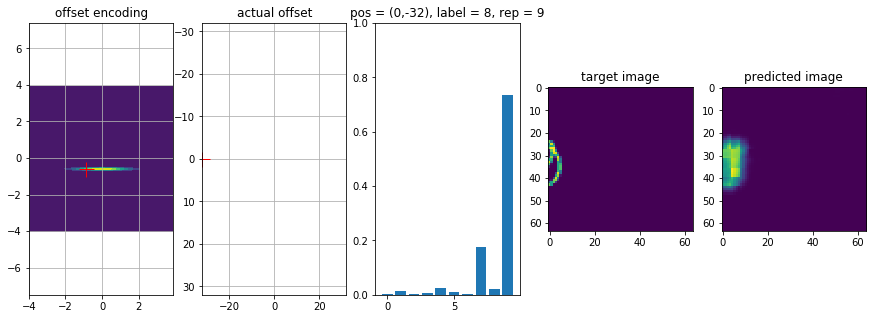

torch.Size([50, 1, 28, 28])
0 -28
[[-0.00212477  1.74716376]] [[-1.85378561  1.67417149]]


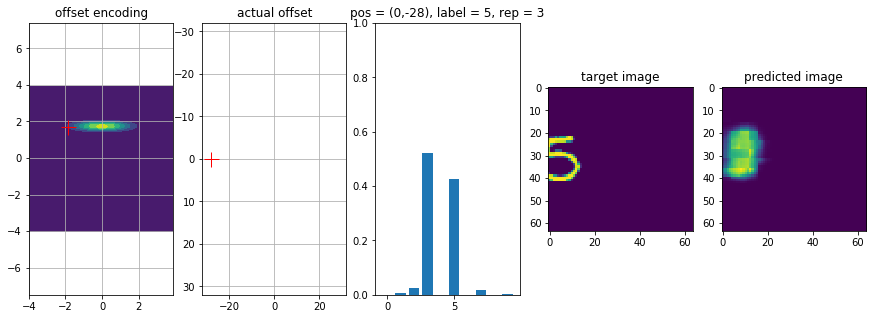

torch.Size([50, 1, 28, 28])
0 -24
[[-0.00181145  0.72579768]] [[-0.70500881  0.80573723]]


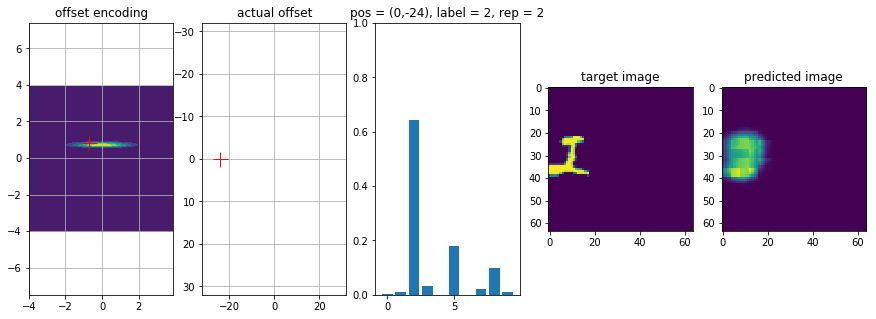

torch.Size([50, 1, 28, 28])
0 -20
[[  2.35099796e-03  -2.53165808e+00]] [[-1.32457773 -2.02394858]]


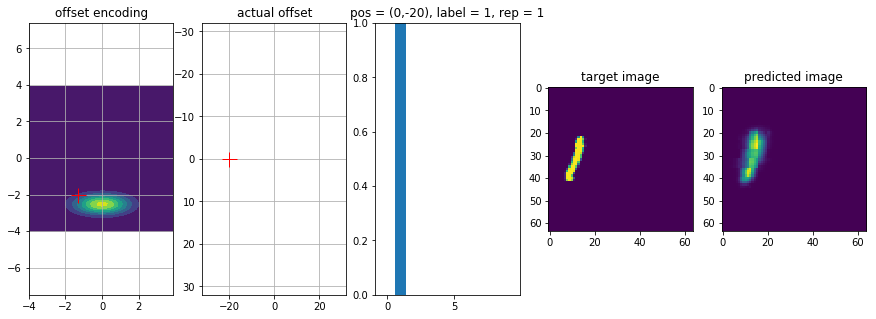

torch.Size([50, 1, 28, 28])
0 -16
[[-0.00265637  0.41575444]] [[ 1.99378347  0.42533138]]


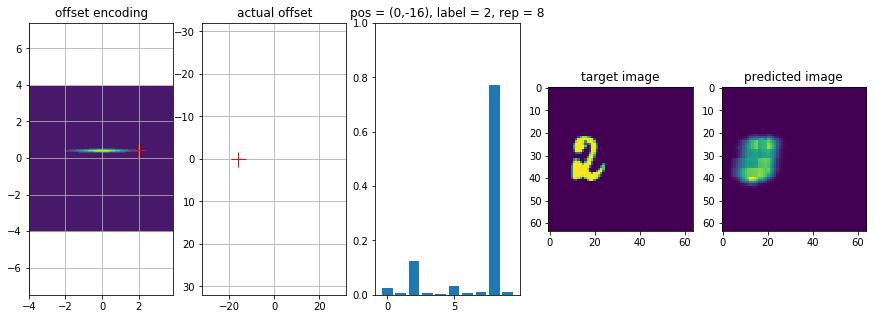

torch.Size([50, 1, 28, 28])
0 -12
[[  1.55719996e-03  -2.13993007e+00]] [[-0.89003131 -2.27861872]]


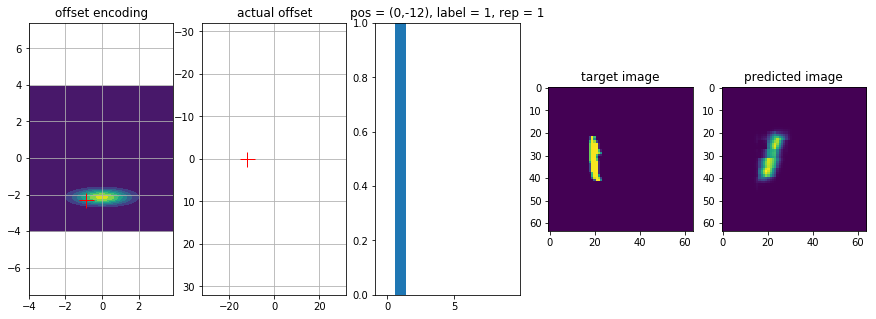

torch.Size([50, 1, 28, 28])
0 -8
[[-0.00331149 -0.10862224]] [[-0.79434015 -0.11660738]]


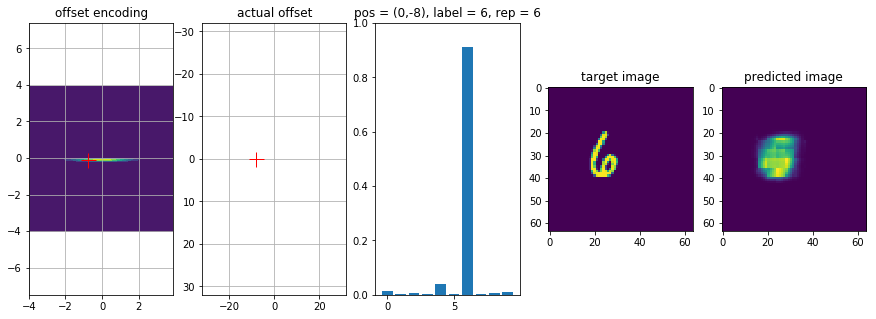

torch.Size([50, 1, 28, 28])
0 -4
[[-0.0045021   2.43257133]] [[-0.28787667  2.47083494]]


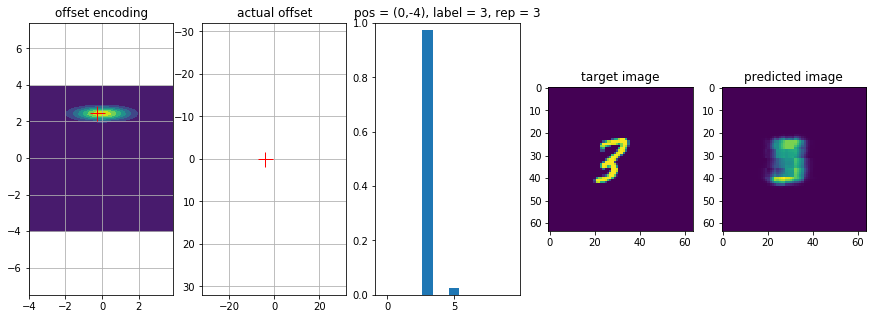

torch.Size([50, 1, 28, 28])
0 0
[[-0.00121529 -0.89032392]] [[-0.23037519 -0.8966531 ]]


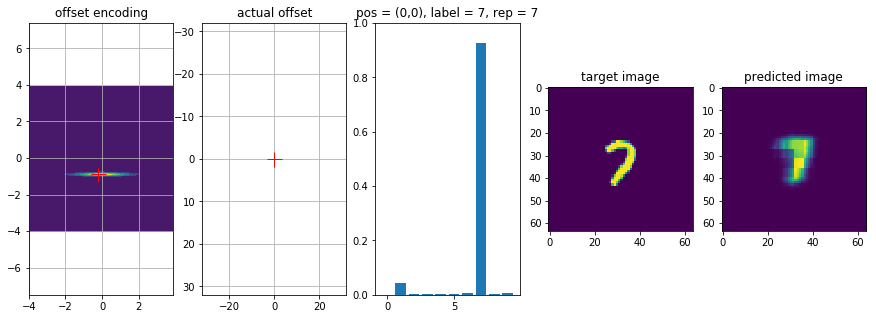

torch.Size([50, 1, 28, 28])
0 4
[[-0.00327745  0.20868462]] [[-0.63599608  0.18780985]]


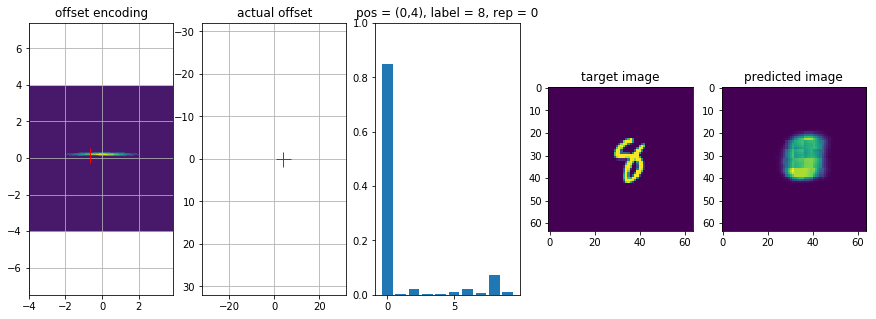

torch.Size([50, 1, 28, 28])
0 8
[[-0.00280274 -0.41172734]] [[ 1.04429015 -0.42005576]]


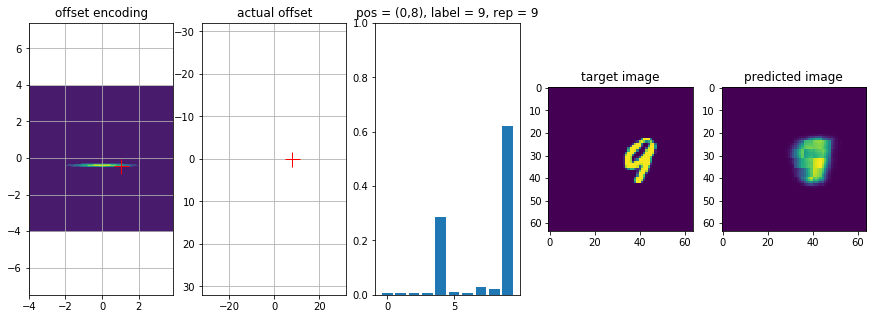

torch.Size([50, 1, 28, 28])
0 12
[[-0.00249026  0.5468736 ]] [[ 0.22417193  0.60376286]]


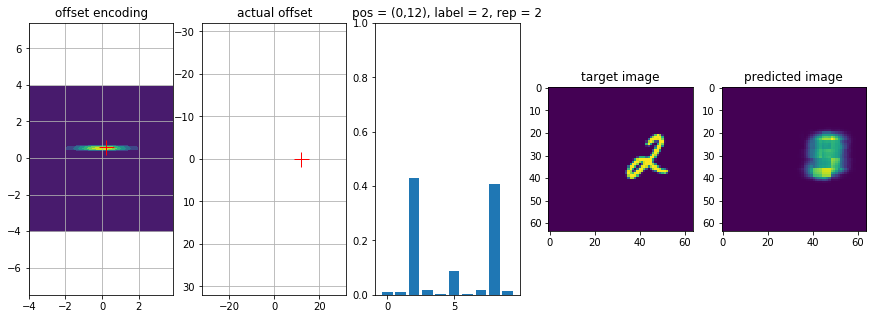

torch.Size([50, 1, 28, 28])
0 16
[[-0.00345153 -0.31220019]] [[ 0.99249559 -0.29747962]]


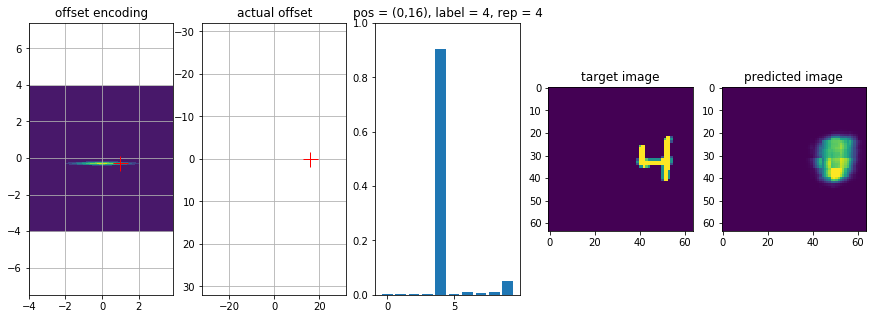

torch.Size([50, 1, 28, 28])
0 20
[[-0.00362393 -0.10025916]] [[-0.19056487 -0.09011432]]


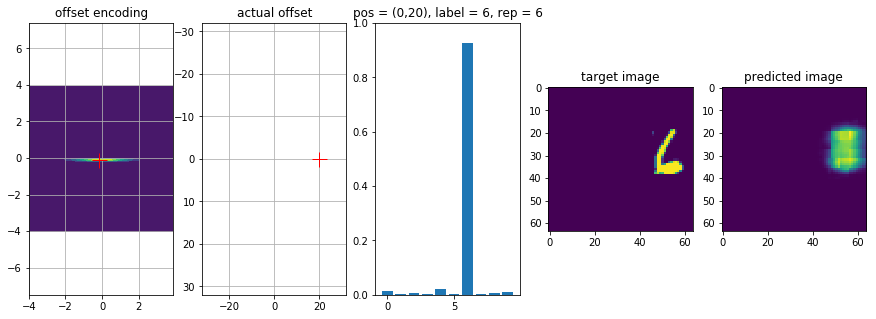

torch.Size([50, 1, 28, 28])
0 24
[[-0.0019147   0.59575544]] [[ 0.70531809  0.63511243]]


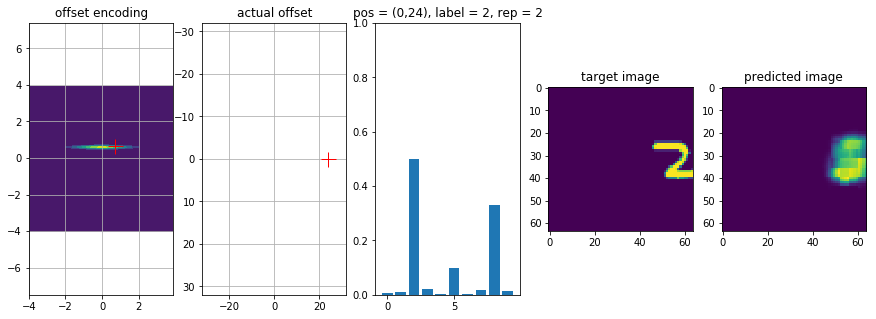

torch.Size([50, 1, 28, 28])
0 28
[[-0.00080155  0.5494764 ]] [[ 1.36442619  0.55227209]]


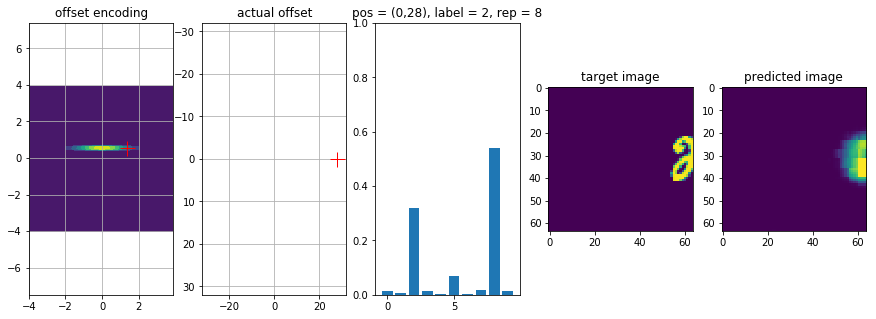

In [20]:
%matplotlib inline
import torch

from Where_act_code_VAE_classif_rot import couples_gen
from scipy.stats import multivariate_normal

import numpy as np
import torch.nn.functional as F


N_test = 10

for _ in range(-32,32,4): #range(N_test):
    '''i_offset = np.random.randint(args.size)
    j_offset = np.random.randint(args.size)'''
#     mid = np.int(ml.args.size / 2)
#     draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))
#     i_offset = min(max(-mid, np.int(draw[0] * mid / 3)), mid)
#     j_offset = min(max(-mid, np.int(draw[1] * mid / 3)), mid)
    data, label = next(iter(ml.dataset.data_loader))
    print (data.shape)  
    idx = 0
    #label[idx] = 0
    i_offset = 0
    j_offset = _
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    import matplotlib.pyplot as plt
    fig, ax = plt.subplots(1, 5, figsize=((15, 5)))
    #ax[0].imshow(a_data)
    ax[3].imshow(data_full)
    ax[3].set_title('target image')
   
    x_hat_logit_output, mu_output, logvar_output, u_output, z_hat_logit_output = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                                                                      torch.from_numpy(label_full[None, :]),
                                                                      torch.from_numpy(pos_full[None, :]))[:5]
    ax[4].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    ax[4].set_title('predicted image')
    #ax[2].imshow(F.sigmoid(output[0, 0, :, :]).detach().numpy())
    #plt.title("("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item()))
    #rep = torch.argmax(z_hat_logit_output).detach().numpy()

    #ig, ax = plt.subplots(1, 3, figsize=((13, 5)))
    #ax[0].plot(a_data)
    ax[1].plot(j_offset, i_offset, 'r+', ms = 15)
    ax[1].set_xlim([-32, 32])
    ax[1].set_ylim([32, -32])
    ax[1].xaxis.grid(True)
    ax[1].yaxis.grid(True)
    ax[1].set_title('actual offset')

    u_offset = u_output[:,2:].detach().numpy()
    mu_offset = mu_output[:,2:].detach().numpy()
    logvar_offset = logvar_output[:,2:].detach().numpy()
    DIM1 = 0
    DIM2 = 1
    axe_x, axe_y = np.mgrid[-4:4:.1, -4:4:.1]
    q = multivariate_normal(mu_offset[0], np.exp(logvar_offset[0]) * np.eye(2))
    pos = np.empty(axe_x.shape + (2,))
    pos[:, :, DIM1] = axe_x; pos[:, :, DIM2] = axe_y

    print(mu_offset, u_offset)
    ax[0].contourf(axe_x, axe_y, q.pdf(pos))
    ax[0].plot(u_offset[0][0], u_offset[0][1], 'r+', ms = 15)
    ax[0].xaxis.grid(True)
    ax[0].set_xlim([-4, 4])
    ax[0].set_ylim([-4, 4])
    ax[0].yaxis.grid(True)
    ax[0].set_title('offset encoding')    
    ax[0].axis('equal')
    
    '''ax[2].imshow(F.sigmoid(x_hat_logit_output.view(64, 64)).detach().numpy())
    ax[2].set_title('predicted image')'''
    rep = torch.argmax(z_hat_logit_output).detach().numpy()
    ax[2].bar(np.arange(10), F.softmax(z_hat_logit_output[0,:]).detach().numpy())
    ax[2].set_ylim([0,1])
    ax[2].set_title("pos = ("+str(i_offset)+","+str(j_offset)+"), label = "+str(label[idx].item())+', rep = '+str(rep))

    
    plt.show()    

Apres environ 100 epoques

tensor(3)
0 0


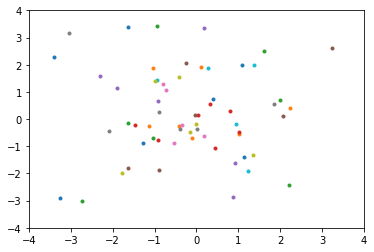

tensor(3)
0 0


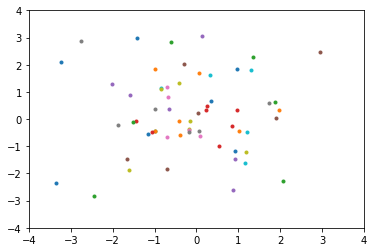

tensor(3)
0 0


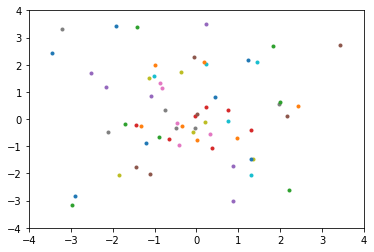

tensor(3)
0 0


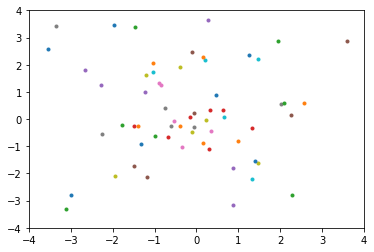

tensor(3)
0 0


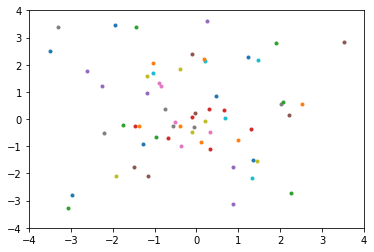

tensor(3)
0 0


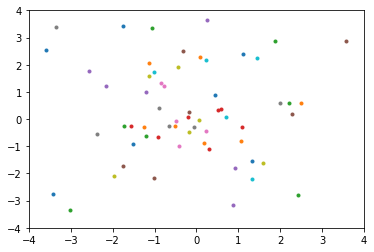

tensor(3)
0 0


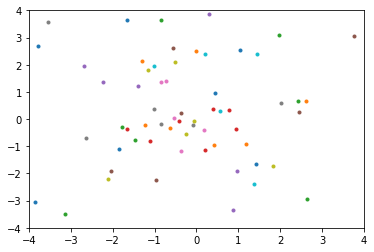

tensor(3)
0 0


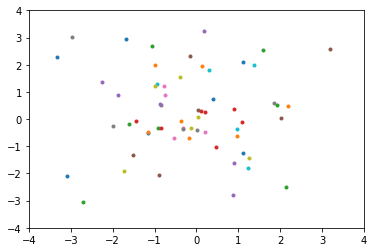

tensor(3)
0 0


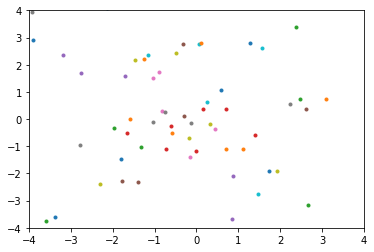

tensor(3)
0 0


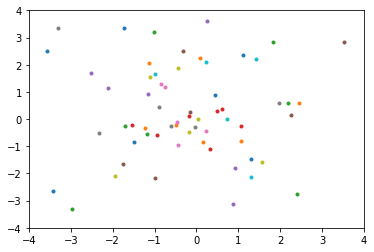

tensor(3)
0 0


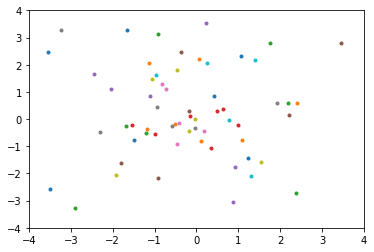

tensor(3)
0 0


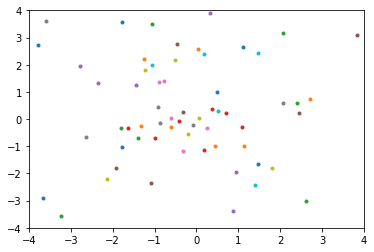

tensor(3)
0 0


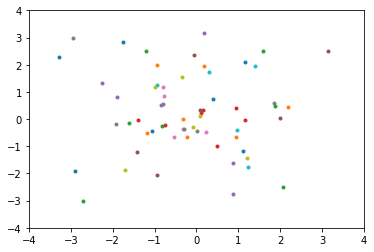

tensor(3)
0 0


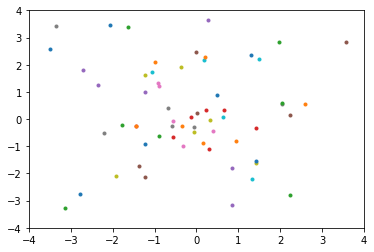

tensor(3)
0 0


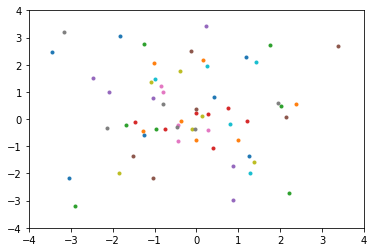

tensor(3)
0 0


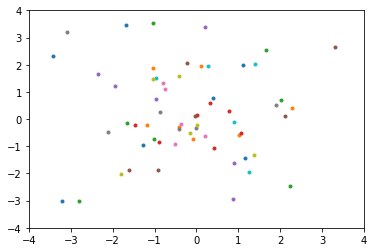

In [19]:
from Where_act_code_VAE_classif_rot import couples_gen
data, label = next(iter(ml.dataset.data_loader))
idx = 0
for _ in range(-32,32,4):
    #label[idx] = z
    idx = 1
    print(label[idx])
    i_offset = 0
    j_offset = 0 
    print(i_offset, j_offset)
    data_full, label_full, pos_full = couples_gen(data[idx, 0, :, :], label[idx], i_offset, j_offset, size=args.size, contrast=1.)
    label_full = np.array(label_full, dtype = 'double')
    x, d1, d2, d3 = ml.model(torch.from_numpy(data_full[None, None, :, :]), 
                        torch.from_numpy(label_full[None, :]),
                        torch.from_numpy(pos_full[None, :]))[4:]
    plt.plot(d2.detach().numpy(),d3.detach().numpy(),'.')
    plt.xlim([-4, 4])
    plt.ylim([-4, 4])
    plt.show()



In [ ]:
_ = plt.plot(data_full)

In [ ]:
size = 256
grid_x, grid_y = np.abs(np.mgrid[-size/2:size/2, -size/2:size/2]) * 8 / size
pos = np.empty((size, size, 2))
pos[:, :, 0] = grid_x; pos[:, :, 1] = grid_y
d = multivariate_normal([0, 0], [[1, 0], [0, 1]])
mask = d.pdf(pos)
mask2 = np.exp(-20 * mask)
_ = plt.imshow(mask2)

In [ ]:
np.random.randn(5)

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :]))#.double())
output.shape

In [ ]:
output = torch.from_numpy(data_full[None, None, :, :].astype(np.float))
output.shape

In [ ]:
output = ml.model(torch.from_numpy(data_full[None, None, :, :])).detach().numpy()[0, 0, :, :]
output.shape

In [ ]:
output.min(), output.max()

In [ ]:
_ = plt.plot(a_data)

In [ ]:
draw = np.random.multivariate_normal((0,0),((1,0),(0,1)))

In [ ]:
plt.plot(ml.model.deconv1.bias.detach().numpy())

In [ ]:
plt.plot((1 + np.tanh(ml.model.fc4.bias.detach().numpy()))/2)

In [ ]:
plt.imshow(np.reshape(ml.model.fc4.bias.detach().numpy(),(64,64)))

In [ ]:
data, foo = next(iter(ml.dataset.data_loader))

In [ ]:
foo

In [ ]:
target_full = np.zeros(10, dtype = 'int')

In [ ]:
target_full

In [ ]:
loss_u = torch.zeros(1)

In [ ]:
un = torch.ones(1,1)
torch.cat((un, un, un), 0)

In [ ]:
torch.randn(5)